# functions

*  **function for generating the sequence of degrees**

In [2]:
from networkx.generators.degree_seq import random_degree_sequence_graph
from networkx.algorithms.graphical import is_graphical
from networkx.utils.random_sequence import powerlaw_sequence
from math import floor
    
def make_sequence(n, t): # makes a sequence with power law distribution with n elements that n is the number of nodes, each shows the degree of a node. and t is alpha
    while True:
      seq = sorted([floor(d) for d in powerlaw_sequence(n, t)], reverse=True)  # because the elements show the degree of nodes, they should be integer
      if is_graphical(seq): # check if the elements of the degree sequence can be the degrees of a valid graph
          break
    return seq
# This part was going to be used for generating a graph from the degrees sequence, but it doesn't work for large graphs
# G = random_degree_sequence_graph(seq, tries=100)
# print(sorted(d for _, d in G.degree()))

*   **function for evaluating the average degree of the graph**

In [3]:
def eval_k(seq):
    sum=0
    i=0
    while i < len(seq):
            sum = sum + seq[i]
            i = i + 1
    k = sum/len(seq)
    return k

*   **function for generating the adjacency vector from the degree sequence**

In [4]:
def generate_adj_vector(degreeSeq):
    adj = [[] for i in degreeSeq]
    n = len(degreeSeq)
    # degreeSeq is descending
    for i in range(n):
      for j in range(i + 1, n):
        if (degreeSeq[i] <= 0):
            break
        if (degreeSeq[i] > 0 and degreeSeq[j] > 0):
          # Decrement the degree of both vertices.
          degreeSeq[i] -= 1
          degreeSeq[j] -= 1
          adj[i].append(j)
          adj[j].append(i)
    return adj



*   **function for finding the greatest component using BFS algorithm**





In [5]:
def greatest_component(visited, graph, node):
  visited = [0 for i in range(len(graph))] # list of visited nodes
  queue = [] 
  visited[node] = 1;
  queue.append(node)
  gComponent = []
  while queue:
    s = queue.pop(0) 
    visited[s] = 1
    gComponent.append(s) # all reachable nodes will be appended
    for neighbour in graph[s]: 
      if visited[neighbour] == 0:
        visited[neighbour] = 1
        queue.append(neighbour)
  return gComponent

* **function for calculating the shortest distance between each 2 nodes in the graph**

In [6]:
def BFS(adj, src, dest, v, pred, dist):
    queue = []
    visited = [False for i in range(len(v))]; # initially all vertices are unvisited
    for i in range(len(v)):
      dist[i] = 1000000 # no path is yet constructed so all the destinations are set to infinity
      pred[i] = -1;
    if src == dest:
      return 0
    visited[src] = True; # source is first to be visited
    dist[src] = 0; # distance from source to itself should be 0
    queue.append(src);
    # standard BFS algorithm
    while (len(queue) != 0):
        u = queue[0];
        queue.pop(0);
        for i in range(len(adj[u])):
          if (visited[adj[u][i]] == False):
            visited[adj[u][i]] = True;
            dist[adj[u][i]] = dist[u] + 1;
            pred[adj[u][i]] = u;
            queue.append(adj[u][i]);
            if (adj[u][i] == dest): # stop BFS when we found the destination
              return dist[dest];

def shortestDistance(adj, src, dest, v):
  pred = [0 for i in range(len(v))]
  dist = [0 for i in range(len(v))]
  sDistance = BFS(adj, src, dest, v, pred, dist)
  return sDistance



# > alpha = 2



1.  n = 10**2 

*   **using the functions to generate a sequence with #nodes=100 & alpha=2 & average k=3**

In [80]:
while True:
    seq_10_2_2 = make_sequence(10**2, 2)
    k = eval_k(seq_10_2_2)
    print(k)
    if k < 2.5:
      break

3.54
5.12
3.54
3.86
3.64
4.86
3.1
2.88
4.46
5.22
3.18
4.04
3.24
4.36
4.56
2.92
4.16
3.34
4.74
4.38
4.6
2.9
2.62
3.4
4.34
3.0
3.52
4.16
4.54
3.52
3.26
3.84
4.9
4.9
3.18
4.46
3.24
4.24
4.2
4.2
4.28
3.54
3.8
3.92
4.22
3.46
3.62
2.6
3.54
3.44
3.44
4.34
3.54
4.44
3.54
3.82
4.32
3.46
3.92
4.26
4.38
2.94
5.44
4.48
4.5
3.82
4.24
3.26
3.84
3.5
3.5
3.9
4.42
3.14
4.32
3.4
3.32
4.84
3.9
5.26
4.02
3.86
3.66
3.48
5.06
3.14
4.06
3.42
3.7
3.8
4.36
2.3


In [81]:
print(eval_k(seq_10_2_2))
seq_10_2_2 = [s-1 for s in seq_10_2_2]
print(eval_k(seq_10_2_2))

2.3
1.3


In [82]:
seq_10_2_2

[30,
 11,
 11,
 9,
 8,
 5,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]



*   **showing that the distribution of the sequence is power law , by ploting the sequence and showing that its loglog plot is linear**




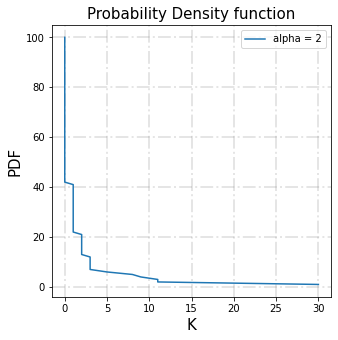

In [83]:
import matplotlib.pyplot as plt

y = range(1, 101)
plt.plot(seq_10_2_2, y, label='alpha = 2')
plt.xlabel('K', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.title('Probability Density function', fontsize=15)
plt.grid(b=True, color='grey', alpha=0.2, linestyle='-.', linewidth=2)
plt.rcParams["figure.figsize"] = [5, 5]
plt.legend(loc='best')
plt.show()

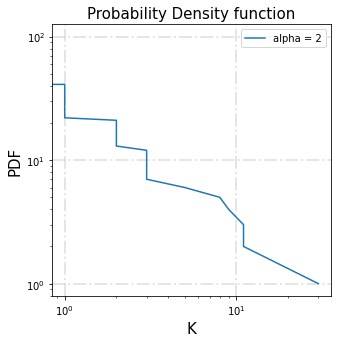

In [84]:
import matplotlib.pyplot as plt

y = range(1, 101)
plt.loglog(seq_10_2_2, y, label='alpha = 2')
plt.xlabel('K', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.title('Probability Density function', fontsize=15)
plt.grid(b=True, color='grey', alpha=0.2, linestyle='-.', linewidth=2)
plt.rcParams["figure.figsize"] = [5, 5]
plt.legend(loc='best')
plt.show()

*   **using the functions to create an adjacency vector from the degree sequence of the graph and find the graph's greatest component**



In [85]:
adj_vector_10_2_2 = generate_adj_vector([x for x in seq_10_2_2])
adj_vector_10_2_2

[[1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [0, 1, 2, 4, 5, 12, 13, 14, 15],
 [0, 1, 2, 3, 5, 16, 17, 18],
 [0, 1, 2, 3, 4],
 [0, 1, 2],
 [0, 1, 2],
 [0, 1, 2],
 [0, 1, 2],
 [0, 1, 2],
 [0, 1, 2],
 [0, 3],
 [0, 3],
 [0, 3],
 [0, 3],
 [0, 4],
 [0, 4],
 [0, 4],
 [0, 20],
 [0, 19],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [32],
 [31],
 [34],
 [33],
 [36],
 [35],
 [38],
 [37],
 [40],
 [39],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 []]

In [86]:
visited = []
gComponent_10_2_2 = greatest_component(visited, [x for x in adj_vector_10_2_2], 0)
gComponent_10_2_2

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30]

* **making the graph connected**

In [87]:
components_10_2_2 = []
visited = []
exist = [ 0 for x in seq_10_2_2]
components_10_2_2.append((greatest_component(visited, [x for x in adj_vector_10_2_2], 0)))
for i in components_10_2_2[-1]:
  exist[i] = 1

for i in range(len(seq_10_2_2)):
  if exist[i] == 0:
    visited = []
    components_10_2_2.append((greatest_component(visited, [x for x in adj_vector_10_2_2], i)))
    for k in components_10_2_2[-1]:
      exist[k] = 1

print(components_10_2_2)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], [31, 32], [33, 34], [35, 36], [37, 38], [39, 40], [41], [42], [43], [44], [45], [46], [47], [48], [49], [50], [51], [52], [53], [54], [55], [56], [57], [58], [59], [60], [61], [62], [63], [64], [65], [66], [67], [68], [69], [70], [71], [72], [73], [74], [75], [76], [77], [78], [79], [80], [81], [82], [83], [84], [85], [86], [87], [88], [89], [90], [91], [92], [93], [94], [95], [96], [97], [98], [99]]


In [88]:
x = 0
for i in components_10_2_2[1:] :
  for j in i:
    adj_vector_10_2_2[j].append(x)
    adj_vector_10_2_2[x].append(j)
    seq_10_2_2[x] += 1
    seq_10_2_2[j] += 1
    x +=1

adj_vector_10_2_2

[[1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31],
 [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 32],
 [0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 33],
 [0, 1, 2, 4, 5, 12, 13, 14, 15, 34],
 [0, 1, 2, 3, 5, 16, 17, 18, 35],
 [0, 1, 2, 3, 4, 36],
 [0, 1, 2, 37],
 [0, 1, 2, 38],
 [0, 1, 2, 39],
 [0, 1, 2, 40],
 [0, 1, 2, 41],
 [0, 1, 2, 42],
 [0, 3, 43],
 [0, 3, 44],
 [0, 3, 45],
 [0, 3, 46],
 [0, 4, 47],
 [0, 4, 48],
 [0, 4, 49],
 [0, 20, 50],
 [0, 19, 51],
 [0, 52],
 [0, 53],
 [0, 54],
 [0, 55],
 [0, 56],
 [0, 57],
 [0, 58],
 [0, 59],
 [0, 60],
 [0, 61],
 [32, 0, 62],
 [31, 1, 63],
 [34, 2, 64],
 [33, 3, 65],
 [36, 4, 66],
 [35, 5, 67],
 [38, 6, 68],
 [37, 7, 69],
 [40, 8, 70],
 [39, 9, 71],
 [10, 72],
 [11, 73],
 [12, 74],
 [13, 75],
 [14, 76],
 [15, 77],
 [16, 78],
 [17, 79],
 [18, 80],
 [19, 81],
 [20, 82],
 [21, 83],
 [22, 84],
 [23, 85],
 [24, 86],
 [25, 87],
 [26, 88],
 [

In [89]:
seq_10_2_2 = sorted(seq_10_2_2, reverse=True)
seq_10_2_2

[31,
 12,
 12,
 10,
 9,
 6,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [90]:
k = eval_k(seq_10_2_2)
k

2.68

In [91]:
from random import randint

for i in range(len(seq_10_2_2)):
  flag = 0
  x = randint(0, len(seq_10_2_2) - 1)
  y = randint(0, len(seq_10_2_2) - 1)
  if x != y and eval_k(seq_10_2_2) < 3:
    for k in adj_vector_10_2_2[x]:
      if k == y:
        flag = 1
        break
    if flag == 1:
      continue
    else:
      adj_vector_10_2_2[x].append(y)
      adj_vector_10_2_2[y].append(x)
      seq_10_2_2[x] += 1
      seq_10_2_2[y] += 1

In [92]:
k = eval_k(seq_10_2_2)
k

3.0

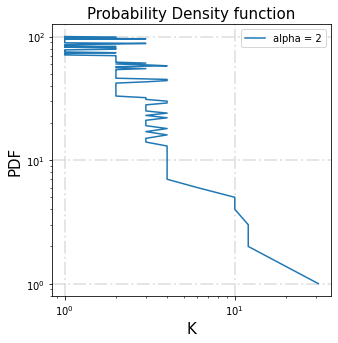

In [93]:
import matplotlib.pyplot as plt

y = range(1, 101)
plt.loglog(seq_10_2_2, y, label='alpha = 2')
plt.xlabel('K', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.title('Probability Density function', fontsize=15)
plt.grid(b=True, color='grey', alpha=0.2, linestyle='-.', linewidth=2)
plt.rcParams["figure.figsize"] = [5, 5]
plt.legend(loc='best')
plt.show()

In [94]:
components_10_2_2 = []
visited = []
components_10_2_2.append((greatest_component(visited, [x for x in adj_vector_10_2_2], 0)))

exist = [ 0 for x in seq_10_2_2]
for i in range(len(seq_10_2_2)):
  for j in components_10_2_2:
    for k in j:
      exist[k] = 1
  if exist[i] == 0:
    visited = []
    components_10_2_2.append((greatest_component(visited, [x for x in adj_vector_10_2_2], i)))

print(components_10_2_2) # now the graph is connected

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 58, 44, 45, 46, 47, 48, 57, 49, 50, 51, 52, 53, 54, 55, 56, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 87, 98, 89, 75, 76, 77, 78, 79, 88, 82, 80, 81, 83, 84, 85, 95, 86, 90, 91, 92, 93, 94, 96, 97, 99]]


* **using BFS and shortestDistance function to calculate the average distance of the nodes in the graph**

In [95]:
dSum = 0
counter = 0
for i in range(len(seq_10_2_2)):
  for j in range(len(seq_10_2_2)):
    if i != j and i < j:
      dSum += shortestDistance(adj_vector_10_2_2, i, j, seq_10_2_2)
      counter+=1
avgDistance = dSum/counter
avgDistance

3.9371717171717173



---



2.  n = 10**4

*   **using the functions to generate a sequence with #nodes=10000 & alpha=2 & average k=3**

In [ ]:
while True:
    seq_10_4_2 = make_sequence(10**4, 2)
    k = eval_k(seq_10_4_2)
    print(k)
    if k < 6.5: # with n=10000 and alpha=2, k couldn't get less
      break

8.6324
8.007
9.2536
7.4128
8.9598
7.9218
7.3812
8.0228
7.0408
6.7892
8.9242
8.2314
8.7858
8.9788
7.5894
8.948
7.5046
9.2988
8.1724
7.608
9.2706
9.2762
9.366
8.237
7.2368
8.5252
7.4542
8.9076
8.5724
7.6358
8.213
8.5172
8.7366
8.9332
7.4604
8.8234
8.0724
8.5
9.063
9.0112
8.7526
7.0988
8.385
7.5004
8.6886
7.6852
8.4648
7.6926
8.7744
6.2574


In [ ]:
seq_10_4_2

[2067,
 991,
 935,
 786,
 671,
 630,
 526,
 483,
 470,
 462,
 431,
 403,
 379,
 359,
 352,
 309,
 303,
 289,
 283,
 281,
 268,
 256,
 255,
 253,
 246,
 242,
 236,
 231,
 218,
 217,
 211,
 211,
 202,
 200,
 199,
 198,
 197,
 192,
 174,
 172,
 170,
 164,
 160,
 148,
 142,
 141,
 141,
 141,
 140,
 135,
 133,
 132,
 131,
 131,
 131,
 130,
 126,
 126,
 119,
 118,
 115,
 114,
 113,
 112,
 111,
 111,
 110,
 108,
 107,
 107,
 107,
 107,
 106,
 103,
 103,
 102,
 101,
 99,
 97,
 96,
 95,
 94,
 93,
 93,
 93,
 92,
 91,
 91,
 91,
 91,
 91,
 89,
 88,
 88,
 88,
 87,
 87,
 81,
 81,
 81,
 80,
 79,
 76,
 75,
 75,
 74,
 74,
 74,
 73,
 73,
 73,
 72,
 71,
 71,
 71,
 70,
 70,
 69,
 69,
 68,
 68,
 67,
 67,
 65,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 63,
 63,
 63,
 62,
 62,
 62,
 61,
 60,
 59,
 58,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 56,
 56,
 55,
 55,
 55,
 55,
 55,
 54,
 54,
 54,
 53,
 53,
 53,
 53,
 53,
 52,
 52,
 52,
 52,
 52,
 51,
 50,
 50,
 50,
 49,
 49,
 49,
 48,
 48,
 48,
 48,
 48,
 47,
 47,
 47,
 4

* **modifying the degree sequence to have avg k=3**

In [ ]:
print(eval_k(seq_10_4_2))
seq_10_4_2_k_modified = [max(s-100, 1) for s in seq_10_4_2] # decreasing the degree of nodes. but the degrees should not be less than 1, because of power law
print(eval_k(seq_10_4_2_k_modified))

# other ways of modification:

# seq_10_4_2_k_modified = []
# for i in seq_10_4_2: # modifying the degree sequence to have avg k=3
#   if i > 1:
#     seq_10_4_2_k_modified.append(i-1)
#   else:
#     seq_10_4_2_k_modified.append(i)

# seq_10_4_2_k_modified = []
# x = 0
# for i in seq_10_4_2: # modifying the degree sequence to have avg k=3
#   if x % 20 == 0 :
#     seq_10_4_2_k_modified.append(i-20)
#   else:
#     seq_10_4_2_k_modified.append(i)
#   x+=1

# seq_10_4_2_k_modified_noIsolated = []
# for i in seq_10_4_2_k_modified: # removing isolated nodes
#   if i > 0:
#     seq_10_4_2_k_modified_noIsolated.append(i)

# seq_10_4_2_k_modified_noIsolated_sec = []
# for x in range(floor((len(seq_10_4_2_k_modified_noIsolated))/20)):
#   seq_10_4_2_k_modified_noIsolated_sec.append(seq_10_4_2_k_modified_noIsolated[floor(x)*20])

# seq_10_4_2_k_modified_noIsolated = []
# for i in seq_10_4_2_k_modified: # removing isolated nodes
#   if i > 0:
#     seq_10_4_2_k_modified_noIsolated.append(i)


6.2574
2.2607


In [ ]:
seq_10_4_2_k_modified

[2909,
 1540,
 1085,
 1015,
 925,
 925,
 841,
 582,
 554,
 553,
 464,
 460,
 448,
 381,
 313,
 311,
 309,
 259,
 246,
 236,
 233,
 212,
 207,
 192,
 189,
 140,
 136,
 134,
 133,
 123,
 108,
 102,
 97,
 93,
 90,
 85,
 79,
 77,
 73,
 71,
 71,
 61,
 58,
 58,
 54,
 51,
 45,
 43,
 41,
 40,
 39,
 39,
 39,
 38,
 36,
 35,
 33,
 33,
 32,
 30,
 30,
 25,
 23,
 21,
 21,
 19,
 19,
 18,
 17,
 17,
 16,
 15,
 15,
 14,
 14,
 11,
 10,
 9,
 8,
 8,
 8,
 6,
 5,
 5,
 4,
 3,
 3,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,



*   **showing that the distribution of the sequence is power law , by ploting the sequence and showing that its loglog plot is linear**




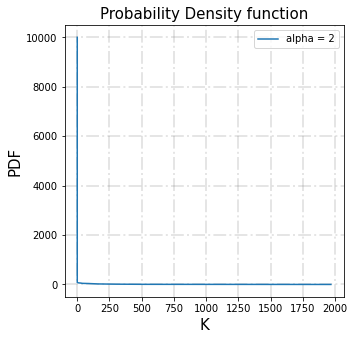

In [ ]:
import matplotlib.pyplot as plt

y = range(1, 10001)
plt.plot(seq_10_4_2_k_modified, y, label='alpha = 2')
plt.xlabel('K', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.title('Probability Density function', fontsize=15)
plt.grid(b=True, color='grey', alpha=0.2, linestyle='-.', linewidth=2)
plt.rcParams["figure.figsize"] = [5, 5]
plt.legend(loc='best')
plt.show()

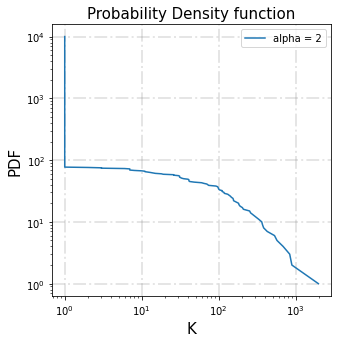

In [ ]:
import matplotlib.pyplot as plt

y = range(1, 10001)
plt.loglog(seq_10_4_2_k_modified, y, label='alpha = 2')
plt.xlabel('K', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.title('Probability Density function', fontsize=15)
plt.grid(b=True, color='grey', alpha=0.2, linestyle='-.', linewidth=2)
plt.rcParams["figure.figsize"] = [5, 5]
plt.legend(loc='best')
plt.show()

*   **using the functions to create an adjacency vector from the degree sequence of the graph and find the graph's greatest component**



In [ ]:
adj_vector_10_4_2 = generate_adj_vector([x for x in seq_10_4_2_k_modified])
adj_vector_10_4_2

[[1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  158,
  

In [ ]:
visited = []
gComponent_10_4_2 = greatest_component(visited, [x for x in adj_vector_10_4_2], 0)
gComponent_10_4_2

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


* **making the graph connected**

In [ ]:
components_10_4_2 = []
visited = []
exist = [ 0 for x in seq_10_4_2_k_modified]
components_10_4_2.append((greatest_component(visited, [x for x in adj_vector_10_4_2], 0)))
for i in components_10_4_2[-1]:
  exist[i] = 1

for i in range(len(seq_10_4_2_k_modified)):
  if exist[i] == 0:
    visited = []
    components_10_4_2.append((greatest_component(visited, [x for x in adj_vector_10_4_2], i)))
    for k in components_10_4_2[-1]:
      exist[k] = 1

print(components_10_4_2)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221

In [ ]:
x = 0
for i in components_10_4_2[1:] :
  for j in i:
    adj_vector_10_4_2[j].append(x)
    adj_vector_10_4_2[x].append(j)
    seq_10_4_2_k_modified[x] += 1
    seq_10_4_2_k_modified[j] += 1
    x +=1

adj_vector_10_4_2

[[1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  158,
  

In [ ]:
seq_10_4_2_k_modified = sorted(seq_10_4_2_k_modified, reverse=True)
seq_10_4_2_k_modified

[1968,
 892,
 836,
 687,
 572,
 531,
 427,
 384,
 371,
 363,
 332,
 304,
 280,
 260,
 253,
 210,
 204,
 190,
 184,
 182,
 169,
 157,
 156,
 154,
 147,
 143,
 137,
 132,
 119,
 118,
 112,
 112,
 103,
 101,
 100,
 99,
 98,
 93,
 75,
 73,
 71,
 65,
 61,
 49,
 43,
 42,
 42,
 42,
 41,
 36,
 34,
 33,
 32,
 32,
 32,
 31,
 27,
 27,
 20,
 19,
 16,
 15,
 14,
 13,
 12,
 12,
 11,
 9,
 8,
 8,
 8,
 8,
 7,
 4,
 4,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 

In [ ]:
k = eval_k(seq_10_4_2_k_modified)
k

2.3485

In [ ]:
from random import randint

for i in range(len(seq_10_4_2_k_modified)):
  flag = 0
  x = randint(0, len(seq_10_4_2_k_modified) - 1)
  y = randint(0, len(seq_10_4_2_k_modified) - 1)
  if x != y and eval_k(seq_10_4_2_k_modified) < 3:
    for k in adj_vector_10_4_2[x]:
      if k == y:
        flag = 1
        break
    if flag == 1:
      continue
    else:
      adj_vector_10_4_2[x].append(y)
      adj_vector_10_4_2[y].append(x)
      seq_10_4_2_k_modified[x] += 1
      seq_10_4_2_k_modified[y] += 1

In [ ]:
k = eval_k(seq_10_4_2_k_modified)
k

3.0001

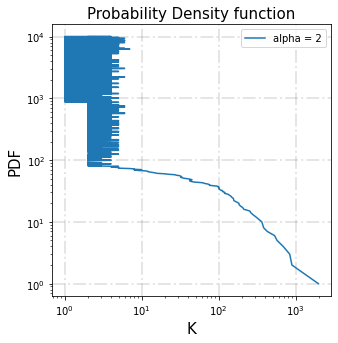

In [ ]:
import matplotlib.pyplot as plt

y = range(1, 10001)
plt.loglog(seq_10_4_2_k_modified, y, label='alpha = 2')
plt.xlabel('K', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.title('Probability Density function', fontsize=15)
plt.grid(b=True, color='grey', alpha=0.2, linestyle='-.', linewidth=2)
plt.rcParams["figure.figsize"] = [5, 5]
plt.legend(loc='best')
plt.show()

In [ ]:
components_10_4_2 = []
visited = []
components_10_4_2.append((greatest_component(visited, [x for x in adj_vector_10_4_2], 0)))

exist = [ 0 for x in seq_10_4_2_k_modified]
for i in range(len(seq_10_4_2_k_modified)):
  for j in components_10_4_2:
    for k in j:
      exist[k] = 1
  if exist[i] == 0:
    visited = []
    components_10_4_2.append((greatest_component(visited, [x for x in adj_vector_10_4_2], i)))

print(components_10_4_2) # now the graph is connected

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221

* **using BFS and shortestDistance function to calculate the average distance of the nodes in the graph**

In [ ]:
dSum = 0
counter = 0
for i in range(floor(len(seq_10_4_2_k_modified)/60)):
  for j in range(floor(len(seq_10_4_2_k_modified)/60)):
    if i != j and i < j:
      dSum += shortestDistance(adj_vector_10_4_2, i*60, j*60, seq_10_4_2_k_modified)
      counter+=1
      print(i*60, j*60)
avgDistance = dSum/counter
avgDistance

Streaming output truncated to the last 5000 lines.
3900 6960
3900 7020
3900 7080
3900 7140
3900 7200
3900 7260
3900 7320
3900 7380
3900 7440
3900 7500
3900 7560
3900 7620
3900 7680
3900 7740
3900 7800
3900 7860
3900 7920
3900 7980
3900 8040
3900 8100
3900 8160
3900 8220
3900 8280
3900 8340
3900 8400
3900 8460
3900 8520
3900 8580
3900 8640
3900 8700
3900 8760
3900 8820
3900 8880
3900 8940
3900 9000
3900 9060
3900 9120
3900 9180
3900 9240
3900 9300
3900 9360
3900 9420
3900 9480
3900 9540
3900 9600
3900 9660
3900 9720
3900 9780
3900 9840
3900 9900
3960 4020
3960 4080
3960 4140
3960 4200
3960 4260
3960 4320
3960 4380
3960 4440
3960 4500
3960 4560
3960 4620
3960 4680
3960 4740
3960 4800
3960 4860
3960 4920
3960 4980
3960 5040
3960 5100
3960 5160
3960 5220
3960 5280
3960 5340
3960 5400
3960 5460
3960 5520
3960 5580
3960 5640
3960 5700
3960 5760
3960 5820
3960 5880
3960 5940
3960 6000
3960 6060
3960 6120
3960 6180
3960 6240
3960 6300
3960 6360
3960 6420
3960 6480
3960 6540
3960 6600
3960 6660

2.962468054034319



---



# COMPARISON

* **calculating the error in the graph with n=100 and alpha=2**

In [ ]:
average_distance_10_2_2 = 3.9371717171717173 # calculated before

* **calculating the error in the graph with n=10000 and alpha=2**

In [ ]:
average_distance_10_4_2 = 2.962468054034319 # calculated before


# > 2 < alpha < 3



1.  n = 10**2

*   **using the functions to generate a sequence with #nodes=100 & alpha=2.4 & average k=3**

In [15]:
while True:
    seq_10_2_2plus = make_sequence(10**2, 2.8)
    k = eval_k(seq_10_2_2plus)
    print(k)
    if k < 2.5 :
      break

1.42


In [16]:
seq_10_2_2plus

[7,
 6,
 4,
 4,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]



*   **showing that the distribution of the sequence is power law , by ploting the sequence and showing that its loglog plot is linear**




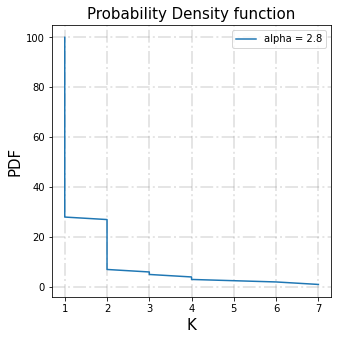

In [17]:
import matplotlib.pyplot as plt

y = range(1, 101)
plt.plot(seq_10_2_2plus, y, label='alpha = 2.8')
plt.xlabel('K', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.title('Probability Density function', fontsize=15)
plt.grid(b=True, color='grey', alpha=0.2, linestyle='-.', linewidth=2)
plt.rcParams["figure.figsize"] = [5, 5]
plt.legend(loc='best')
plt.show()

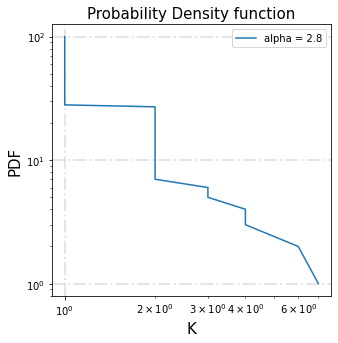

In [18]:
import matplotlib.pyplot as plt

y = range(1, 101)
plt.loglog(seq_10_2_2plus, y, label='alpha = 2.8')
plt.xlabel('K', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.title('Probability Density function', fontsize=15)
plt.grid(b=True, color='grey', alpha=0.2, linestyle='-.', linewidth=2)
plt.rcParams["figure.figsize"] = [5, 5]
plt.legend(loc='best')
plt.show()

*   **using the functions to create an adjacency vector from the degree sequence of the graph and find the graph's greatest component**



In [19]:
adj_vector_10_2_2plus = generate_adj_vector([x for x in seq_10_2_2plus])
adj_vector_10_2_2plus

[[1, 2, 3, 4, 5, 6, 7],
 [0, 2, 3, 4, 5, 6],
 [0, 1, 3, 4],
 [0, 1, 2, 5],
 [0, 1, 2],
 [0, 1, 3],
 [0, 1],
 [0, 8],
 [7, 9],
 [8, 10],
 [9, 11],
 [10, 12],
 [11, 13],
 [12, 14],
 [13, 15],
 [14, 16],
 [15, 17],
 [16, 18],
 [17, 19],
 [18, 20],
 [19, 21],
 [20, 22],
 [21, 23],
 [22, 24],
 [23, 25],
 [24, 26],
 [25, 27],
 [26],
 [29],
 [28],
 [31],
 [30],
 [33],
 [32],
 [35],
 [34],
 [37],
 [36],
 [39],
 [38],
 [41],
 [40],
 [43],
 [42],
 [45],
 [44],
 [47],
 [46],
 [49],
 [48],
 [51],
 [50],
 [53],
 [52],
 [55],
 [54],
 [57],
 [56],
 [59],
 [58],
 [61],
 [60],
 [63],
 [62],
 [65],
 [64],
 [67],
 [66],
 [69],
 [68],
 [71],
 [70],
 [73],
 [72],
 [75],
 [74],
 [77],
 [76],
 [79],
 [78],
 [81],
 [80],
 [83],
 [82],
 [85],
 [84],
 [87],
 [86],
 [89],
 [88],
 [91],
 [90],
 [93],
 [92],
 [95],
 [94],
 [97],
 [96],
 [99],
 [98]]

In [20]:
visited = []
gComponent_10_2_2plus = greatest_component(visited, [x for x in adj_vector_10_2_2plus], 0)
gComponent_10_2_2plus

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27]

* **all the components of the graph**

In [21]:
Components_10_2_2plus = []
visited = []
Components_10_2_2plus.append((greatest_component(visited, [x for x in adj_vector_10_2_2plus], 0)))

exist = [ 0 for x in seq_10_2_2plus]
for i in range(len(seq_10_2_2plus)):
  for j in Components_10_2_2plus:
    for k in j:
      exist[k] = 1
  if exist[i] == 0:
    visited = []
    Components_10_2_2plus.append((greatest_component(visited, [x for x in adj_vector_10_2_2plus], i)))

print(Components_10_2_2plus)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27], [28, 29], [30, 31], [32, 33], [34, 35], [36, 37], [38, 39], [40, 41], [42, 43], [44, 45], [46, 47], [48, 49], [50, 51], [52, 53], [54, 55], [56, 57], [58, 59], [60, 61], [62, 63], [64, 65], [66, 67], [68, 69], [70, 71], [72, 73], [74, 75], [76, 77], [78, 79], [80, 81], [82, 83], [84, 85], [86, 87], [88, 89], [90, 91], [92, 93], [94, 95], [96, 97], [98, 99]]


* **making the graph connected**

In [22]:
x = 0
for i in Components_10_2_2plus[1:] :
  for j in i:
    adj_vector_10_2_2plus[j].append(x)
    adj_vector_10_2_2plus[x].append(j)
    seq_10_2_2plus[x] += 1
    seq_10_2_2plus[j] += 1
    x +=1

adj_vector_10_2_2plus

[[1, 2, 3, 4, 5, 6, 7, 28],
 [0, 2, 3, 4, 5, 6, 29],
 [0, 1, 3, 4, 30],
 [0, 1, 2, 5, 31],
 [0, 1, 2, 32],
 [0, 1, 3, 33],
 [0, 1, 34],
 [0, 8, 35],
 [7, 9, 36],
 [8, 10, 37],
 [9, 11, 38],
 [10, 12, 39],
 [11, 13, 40],
 [12, 14, 41],
 [13, 15, 42],
 [14, 16, 43],
 [15, 17, 44],
 [16, 18, 45],
 [17, 19, 46],
 [18, 20, 47],
 [19, 21, 48],
 [20, 22, 49],
 [21, 23, 50],
 [22, 24, 51],
 [23, 25, 52],
 [24, 26, 53],
 [25, 27, 54],
 [26, 55],
 [29, 0, 56],
 [28, 1, 57],
 [31, 2, 58],
 [30, 3, 59],
 [33, 4, 60],
 [32, 5, 61],
 [35, 6, 62],
 [34, 7, 63],
 [37, 8, 64],
 [36, 9, 65],
 [39, 10, 66],
 [38, 11, 67],
 [41, 12, 68],
 [40, 13, 69],
 [43, 14, 70],
 [42, 15, 71],
 [45, 16, 72],
 [44, 17, 73],
 [47, 18, 74],
 [46, 19, 75],
 [49, 20, 76],
 [48, 21, 77],
 [51, 22, 78],
 [50, 23, 79],
 [53, 24, 80],
 [52, 25, 81],
 [55, 26, 82],
 [54, 27, 83],
 [57, 28, 84],
 [56, 29, 85],
 [59, 30, 86],
 [58, 31, 87],
 [61, 32, 88],
 [60, 33, 89],
 [63, 34, 90],
 [62, 35, 91],
 [65, 36, 92],
 [64, 37, 93],

In [23]:
seq_10_2_2plus = sorted(seq_10_2_2plus, reverse=True)
seq_10_2_2plus

[8,
 7,
 5,
 5,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [24]:
k = eval_k(seq_10_2_2plus)
k

2.86

In [27]:
from random import randint

for i in range(len(seq_10_2_2plus)):
  flag = 0
  x = randint(0, len(seq_10_2_2plus))
  y = randint(0, len(seq_10_2_2plus))
  if x != y and eval_k(seq_10_2_2plus) < 3:
    for k in adj_vector_10_2_2plus[x]:
      if k == y:
        flag = 1
        break
    if flag == 1:
      continue
    else:
      adj_vector_10_2_2plus[x].append(y)
      adj_vector_10_2_2plus[y].append(x)
      seq_10_2_2plus[x] += 1
      seq_10_2_2plus[y] += 1


In [28]:
k = eval_k(seq_10_2_2plus)
k

3.0

In [29]:
seq_10_2_2plus = sorted(seq_10_2_2plus, reverse=True)
seq_10_2_2plus

[8,
 7,
 6,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

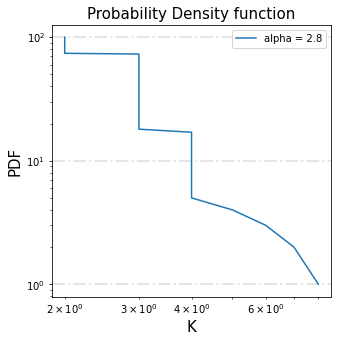

In [30]:
import matplotlib.pyplot as plt

y = range(1, 101)
plt.loglog(seq_10_2_2plus, y, label='alpha = 2.8')
plt.xlabel('K', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.title('Probability Density function', fontsize=15)
plt.grid(b=True, color='grey', alpha=0.2, linestyle='-.', linewidth=2)
plt.rcParams["figure.figsize"] = [5, 5]
plt.legend(loc='best')
plt.show()

In [31]:
Components_10_2_2plus = []
visited = []
Components_10_2_2plus.append((greatest_component(visited, [x for x in adj_vector_10_2_2plus], 0)))

exist = [ 0 for x in seq_10_2_2plus]
for i in range(len(seq_10_2_2plus)):
  for j in Components_10_2_2plus:
    for k in j:
      exist[k] = 1
  if exist[i] == 0:
    visited = []
    Components_10_2_2plus.append((greatest_component(visited, [x for x in adj_vector_10_2_2plus], i)))

print(Components_10_2_2plus) # now the graph is connected

[[0, 1, 2, 3, 4, 5, 6, 7, 28, 29, 30, 68, 31, 32, 33, 34, 8, 35, 56, 71, 57, 58, 69, 40, 96, 59, 41, 60, 61, 62, 9, 36, 63, 84, 70, 43, 99, 85, 86, 97, 12, 87, 13, 88, 89, 90, 10, 37, 64, 91, 42, 98, 15, 65, 11, 14, 38, 92, 16, 93, 39, 66, 17, 44, 67, 94, 18, 45, 72, 95, 19, 46, 73, 20, 47, 74, 21, 48, 75, 22, 49, 76, 23, 50, 77, 24, 51, 78, 25, 52, 79, 26, 53, 80, 27, 54, 81, 55, 82, 83]]


* **using BFS and shortestDistance function to calculate the average distance of the nodes in the graph**

In [33]:
dSum = 0
counter = 0
for i in range(floor(len(seq_10_2_2plus))):
  for j in range(floor(len(seq_10_2_2plus))):
    if i != j and i < j:
      dSum += shortestDistance(adj_vector_10_2_2plus, i, j, seq_10_2_2plus)
      counter+=1
avgDistance = dSum/counter
avgDistance

8.436767676767676



---



2.  n = 10**4

*   **using the functions to generate a sequence with #nodes=10000 & alpha=2.8 & average k=3**

In [37]:
while True:
    seq_10_4_2plus = make_sequence(10**4, 2.8)
    k = eval_k(seq_10_4_2plus)
    print(k)
    if k > 2: 
      break

1.9888
1.9046
1.8384
1.933
1.8416
1.9132
1.964
1.8274
1.9058
1.9018
1.847
1.9002
1.8156
1.9004
1.895
1.9794
2.066


In [38]:
print(eval_k(seq_10_4_2plus))
seq_10_4_2plus = [s-1 for s in seq_10_4_2plus]
print(eval_k(seq_10_4_2plus))

2.066
1.066


In [39]:
seq_10_4_2plus

[1081,
 893,
 191,
 144,
 126,
 106,
 72,
 59,
 58,
 54,
 54,
 51,
 46,
 45,
 42,
 41,
 38,
 35,
 33,
 33,
 33,
 31,
 31,
 31,
 30,
 30,
 29,
 27,
 26,
 26,
 25,
 25,
 23,
 23,
 22,
 22,
 22,
 21,
 21,
 21,
 21,
 20,
 20,
 20,
 20,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 18,
 18,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 



*   **showing that the distribution of the sequence is power law , by ploting the sequence and showing that its loglog plot is linear**




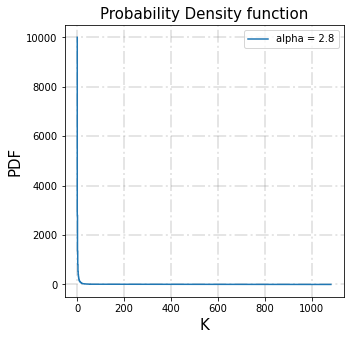

In [40]:
import matplotlib.pyplot as plt

y = range(1, 10001)
plt.plot(seq_10_4_2plus, y, label='alpha = 2.8')
plt.xlabel('K', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.title('Probability Density function', fontsize=15)
plt.grid(b=True, color='grey', alpha=0.2, linestyle='-.', linewidth=2)
plt.rcParams["figure.figsize"] = [5, 5]
plt.legend(loc='best')
plt.show()

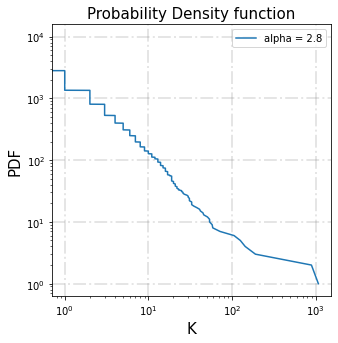

In [41]:
import matplotlib.pyplot as plt

y = range(1, 10001)
plt.loglog(seq_10_4_2plus, y, label='alpha = 2.8')
plt.xlabel('K', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.title('Probability Density function', fontsize=15)
plt.grid(b=True, color='grey', alpha=0.2, linestyle='-.', linewidth=2)
plt.rcParams["figure.figsize"] = [5, 5]
plt.legend(loc='best')
plt.show()

*   **using the functions to create an adjacency vector from the degree sequence of the graph and find the graph's greatest component**



In [42]:
adj_vector_10_4_2plus = generate_adj_vector([x for x in seq_10_4_2plus])
adj_vector_10_4_2plus

[[1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  158,
  

In [43]:
visited = []
gComponent_10_4_2plus = greatest_component(visited, [x for x in adj_vector_10_4_2plus], 0)
gComponent_10_4_2plus

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


* **all the components of the graph**

In [44]:
Components_10_4_2plus = []
visited = []
Components_10_4_2plus.append((greatest_component(visited, [x for x in adj_vector_10_4_2plus], 0)))

exist = [ 0 for x in seq_10_4_2plus]
for i in range(len(seq_10_4_2plus)):
  for j in Components_10_4_2plus:
    for k in j:
      exist[k] = 1
  if exist[i] == 0:
    visited = []
    Components_10_4_2plus.append((greatest_component(visited, [x for x in adj_vector_10_4_2plus], i)))

print(Components_10_4_2plus)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221

* **making the graph connected**

In [45]:
x = 0
for i in Components_10_4_2plus[1:] :
  for j in i:
    adj_vector_10_4_2plus[j].append(x)
    adj_vector_10_4_2plus[x].append(j)
    seq_10_4_2plus[x] += 1
    seq_10_4_2plus[j] += 1
    x +=1

adj_vector_10_4_2plus

[[1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  158,
  

In [46]:
seq_10_4_2plus = sorted(seq_10_4_2plus, reverse=True)
seq_10_4_2plus

[1082,
 894,
 192,
 145,
 127,
 107,
 73,
 60,
 59,
 55,
 55,
 52,
 47,
 46,
 43,
 42,
 39,
 36,
 34,
 34,
 34,
 32,
 32,
 32,
 31,
 31,
 30,
 28,
 27,
 27,
 26,
 26,
 24,
 24,
 23,
 23,
 23,
 22,
 22,
 22,
 22,
 21,
 21,
 21,
 21,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 19,
 19,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8

In [47]:
k = eval_k(seq_10_4_2plus)
k

2.8496

In [48]:
from random import randint

for i in range(len(seq_10_4_2plus)):
  flag = 0
  x = randint(0, len(seq_10_4_2plus) - 1)
  y = randint(0, len(seq_10_4_2plus) - 1)
  if x != y and eval_k(seq_10_4_2plus) < 3:
    for k in adj_vector_10_4_2plus[x]:
      if k == y:
        flag = 1
        break
    if flag == 1:
      continue
    else:
      adj_vector_10_4_2plus[x].append(y)
      adj_vector_10_4_2plus[y].append(x)
      seq_10_4_2plus[x] += 1
      seq_10_4_2plus[y] += 1

In [49]:
k = eval_k(seq_10_4_2plus)
k

3.0

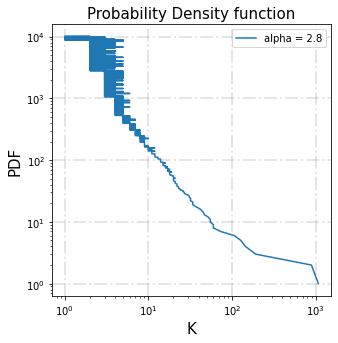

In [50]:
import matplotlib.pyplot as plt

y = range(1, 10001)
plt.loglog(seq_10_4_2plus, y, label='alpha = 2.8')
plt.xlabel('K', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.title('Probability Density function', fontsize=15)
plt.grid(b=True, color='grey', alpha=0.2, linestyle='-.', linewidth=2)
plt.rcParams["figure.figsize"] = [5, 5]
plt.legend(loc='best')
plt.show()

* **using BFS and shortestDistance function to calculate the average distance of the nodes in the graph** 

In [51]:
dSum = 0
counter = 0
for i in range(floor(len(seq_10_4_2plus)/100)):
  for j in range(floor(len(seq_10_4_2plus)/100)):
    if i != j and i < j:
      dSum += shortestDistance(adj_vector_10_4_2plus, i*100, j*100, seq_10_4_2plus)
      counter+=1
avgDistance = dSum/counter
avgDistance

9.412525252525253



---



3.  n = 10**5

*   **using the functions to generate a sequence with #nodes=100000 & alpha=2.8 & average k=3**

In [55]:
while True:
    seq_10_6_2plus = make_sequence(10**5, 2.8)
    k = eval_k(seq_10_6_2plus)
    print(k)
    if k < 1.9:
      break

1.84362


In [56]:
print(eval_k(seq_10_6_2plus))
seq_10_6_2plus = [s-1 for s in seq_10_6_2plus]
print(eval_k(seq_10_6_2plus))

1.84362
0.84362


In [57]:
seq_10_6_2plus

[685,
 317,
 273,
 242,
 211,
 204,
 204,
 186,
 177,
 166,
 155,
 152,
 138,
 134,
 120,
 118,
 117,
 117,
 114,
 107,
 98,
 96,
 95,
 93,
 92,
 92,
 91,
 88,
 87,
 87,
 83,
 82,
 81,
 80,
 78,
 76,
 73,
 73,
 73,
 72,
 72,
 70,
 69,
 68,
 67,
 66,
 66,
 64,
 63,
 63,
 61,
 61,
 61,
 60,
 60,
 59,
 58,
 58,
 57,
 56,
 56,
 56,
 55,
 54,
 54,
 53,
 53,
 52,
 51,
 50,
 49,
 49,
 48,
 48,
 48,
 47,
 47,
 47,
 47,
 47,
 46,
 46,
 45,
 45,
 43,
 43,
 43,
 42,
 42,
 42,
 42,
 42,
 42,
 41,
 41,
 41,
 41,
 41,
 41,
 40,
 40,
 40,
 40,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 38,
 38,
 37,
 37,
 37,
 37,
 36,
 36,
 36,
 36,
 36,
 36,
 36,
 36,
 35,
 35,
 35,
 35,
 35,
 35,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,





*   **showing that the distribution of the sequence is power law , by ploting the sequence and showing that its loglog plot is linear**




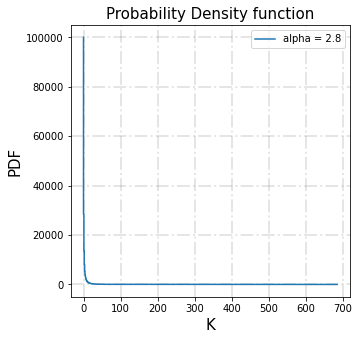

In [58]:
import matplotlib.pyplot as plt

y = range(1, 100001)
plt.plot(seq_10_6_2plus, y, label='alpha = 2.8')
plt.xlabel('K', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.title('Probability Density function', fontsize=15)
plt.grid(b=True, color='grey', alpha=0.2, linestyle='-.', linewidth=2)
plt.rcParams["figure.figsize"] = [5, 5]
plt.legend(loc='best')
plt.show()

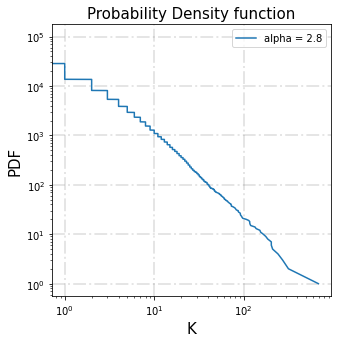

In [59]:
import matplotlib.pyplot as plt

y = range(1, 100001)
plt.loglog(seq_10_6_2plus, y, label='alpha = 2.8')
plt.xlabel('K', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.title('Probability Density function', fontsize=15)
plt.grid(b=True, color='grey', alpha=0.2, linestyle='-.', linewidth=2)
plt.rcParams["figure.figsize"] = [5, 5]
plt.legend(loc='best')
plt.show()

*   **using the functions to create an adjacency vector from the degree sequence of the graph and find the graph's greatest component**



In [60]:
adj_vector_10_6_2plus = generate_adj_vector([x for x in seq_10_6_2plus])
adj_vector_10_6_2plus

[[1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  158,
  

In [61]:
visited = []
gComponent_10_6_2plus = greatest_component(visited, [x for x in adj_vector_10_6_2plus], 0)
gComponent_10_6_2plus

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


* **all the components of the graph**

In [62]:
components_10_6_2plus = []
visited = []
exist = [ 0 for x in seq_10_6_2plus]
components_10_6_2plus.append((greatest_component(visited, [x for x in adj_vector_10_6_2plus], 0)))
for i in components_10_6_2plus[-1]:
  exist[i] = 1

for i in range(len(seq_10_6_2plus)):
  if exist[i] == 0:
    print(i)
    visited = []
    components_10_6_2plus.append((greatest_component(visited, [x for x in adj_vector_10_6_2plus], i)))
    for k in components_10_6_2plus[-1]:
      exist[k] = 1

print(components_10_6_2plus)

Streaming output truncated to the last 5000 lines.
95001
95002
95003
95004
95005
95006
95007
95008
95009
95010
95011
95012
95013
95014
95015
95016
95017
95018
95019
95020
95021
95022
95023
95024
95025
95026
95027
95028
95029
95030
95031
95032
95033
95034
95035
95036
95037
95038
95039
95040
95041
95042
95043
95044
95045
95046
95047
95048
95049
95050
95051
95052
95053
95054
95055
95056
95057
95058
95059
95060
95061
95062
95063
95064
95065
95066
95067
95068
95069
95070
95071
95072
95073
95074
95075
95076
95077
95078
95079
95080
95081
95082
95083
95084
95085
95086
95087
95088
95089
95090
95091
95092
95093
95094
95095
95096
95097
95098
95099
95100
95101
95102
95103
95104
95105
95106
95107
95108
95109
95110
95111
95112
95113
95114
95115
95116
95117
95118
95119
95120
95121
95122
95123
95124
95125
95126
95127
95128
95129
95130
95131
95132
95133
95134
95135
95136
95137
95138
95139
95140
95141
95142
95143
95144
95145
95146
95147
95148
95149
95150
95151
95152
95153
95154
95155
95156
95157
95158
9

* **making the components connected**

In [63]:
x = 0
for i in components_10_6_2plus[1:] :
  for j in i:
    adj_vector_10_6_2plus[j].append(x)
    adj_vector_10_6_2plus[x].append(j)
    seq_10_6_2plus[x] += 1
    seq_10_6_2plus[j] += 1
    x +=1

adj_vector_10_6_2plus

[[1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  158,
  

In [64]:
seq_10_6_2plus = sorted(seq_10_6_2plus, reverse=True)
seq_10_6_2plus

[686,
 318,
 274,
 243,
 212,
 205,
 205,
 187,
 178,
 167,
 156,
 153,
 139,
 135,
 121,
 119,
 118,
 118,
 115,
 108,
 99,
 97,
 96,
 94,
 93,
 93,
 92,
 89,
 88,
 88,
 84,
 83,
 82,
 81,
 79,
 77,
 74,
 74,
 74,
 73,
 73,
 71,
 70,
 69,
 68,
 67,
 67,
 65,
 64,
 64,
 62,
 62,
 62,
 61,
 61,
 60,
 59,
 59,
 58,
 57,
 57,
 57,
 56,
 55,
 55,
 54,
 54,
 53,
 52,
 51,
 50,
 50,
 49,
 49,
 49,
 48,
 48,
 48,
 48,
 48,
 47,
 47,
 46,
 46,
 44,
 44,
 44,
 43,
 43,
 43,
 43,
 43,
 43,
 42,
 42,
 42,
 42,
 42,
 42,
 41,
 41,
 41,
 41,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 39,
 39,
 38,
 38,
 38,
 38,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 36,
 36,
 36,
 36,
 36,
 36,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,


In [65]:
k = eval_k(seq_10_6_2plus)
k

2.78524

In [74]:
from random import randint

for i in range(len(seq_10_6_2plus)):
  flag = 0
  x = randint(0, len(seq_10_6_2plus) - 1)
  y = randint(0, len(seq_10_6_2plus) - 1)
  if x != y and eval_k(seq_10_6_2plus) < 3:
    for k in adj_vector_10_6_2plus[x]:
      if k == y:
        flag = 1
        break
    if flag == 1:
      continue
    else:
      adj_vector_10_6_2plus[x].append(y)
      adj_vector_10_6_2plus[y].append(x)
      seq_10_6_2plus[x] += 1
      seq_10_6_2plus[y] += 1
  elif eval_k(seq_10_6_2plus) >= 3:
    break

In [75]:
k = eval_k(seq_10_6_2plus)
k

3.0

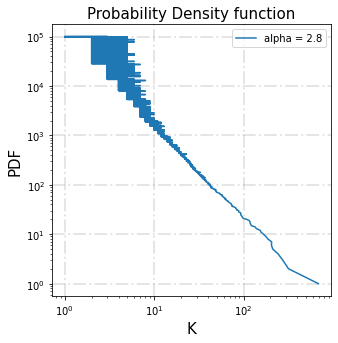

In [76]:
import matplotlib.pyplot as plt

y = range(1, 100001)
plt.loglog(seq_10_6_2plus, y, label='alpha = 2.8')
plt.xlabel('K', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.title('Probability Density function', fontsize=15)
plt.grid(b=True, color='grey', alpha=0.2, linestyle='-.', linewidth=2)
plt.rcParams["figure.figsize"] = [5, 5]
plt.legend(loc='best')
plt.show()

* **using BFS and shortestDistance function to calculate the average distance of the nodes in the graph** 

In [77]:
dSum = 0
counter = 0
for i in range(floor(len(seq_10_6_2plus)/500)):
  for j in range(50):
    if i != j and i<j:
      dSum += shortestDistance(adj_vector_10_6_2plus, i*500, j, seq_10_6_2plus)
      counter+=1
      print(i*500, j)
avgDistance = dSum/counter
avgDistance

0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
500 2
500 3
500 4
500 5
500 6
500 7
500 8
500 9
500 10
500 11
500 12
500 13
500 14
500 15
500 16
500 17
500 18
500 19
500 20
500 21
500 22
500 23
500 24
500 25
500 26
500 27
500 28
500 29
500 30
500 31
500 32
500 33
500 34
500 35
500 36
500 37
500 38
500 39
500 40
500 41
500 42
500 43
500 44
500 45
500 46
500 47
500 48
500 49
1000 3
1000 4
1000 5
1000 6
1000 7
1000 8
1000 9
1000 10
1000 11
1000 12
1000 13
1000 14
1000 15
1000 16
1000 17
1000 18
1000 19
1000 20
1000 21
1000 22
1000 23
1000 24
1000 25
1000 26
1000 27
1000 28
1000 29
1000 30
1000 31
1000 32
1000 33
1000 34
1000 35
1000 36
1000 37
1000 38
1000 39
1000 40
1000 41
1000 42
1000 43
1000 44
1000 45
1000 46
1000 47
1000 48
1000 49
1500 4
1500 5
1500 6
1500 7
1500 8
1500 9
1500 10
1500 11
1500 12
1

7.448163265306122

# COMPARISON

* **calculating the error in the graph with n=100 and alpha=2.8**

In [35]:
from math import log
expected_value_10_2_2plus = log(log(100)) / log(1.8)
expected_value_10_2_2plus

2.598186922226645

In [36]:
average_distance_10_2_2plus = 8.436767676767676 # calculated before
error_percent_10_2_2plus = (abs(average_distance_10_2_2plus - expected_value_10_2_2plus) / expected_value_10_2_2plus) * 100
error_percent_10_2_2plus

224.717502216406

* **calculating the error in the graph with n=10000 and alpha=2.8**

In [53]:
expected_value_10_4_2plus = log(log(10000)) / log(1.8)
expected_value_10_4_2plus

3.777436507066021

In [54]:
average_distance_10_4_2plus = 9.412525252525253 # calculated before
error_percent_10_4_2plus = (abs(average_distance_10_4_2plus - expected_value_10_4_2plus) / expected_value_10_4_2plus) * 100
error_percent_10_4_2plus

149.17759001159416

* **calculating the error in the graph with n=100000 and alpha=2.8**

In [78]:
expected_value_10_6_2plus = log(log(100000)) / log(1.8)
expected_value_10_6_2plus

4.157070079310074

In [79]:
average_distance_10_6_2plus = 7.448163265306122 # calculated before
error_percent_10_6_2plus = (abs(average_distance_10_6_2plus - expected_value_10_6_2plus) / expected_value_10_6_2plus) * 100
error_percent_10_6_2plus

79.16857602126959



---



# >  alpha = 3


1. n = 10**2

*   **using the functions to generate a sequence with #nodes=100 & alpha=3 & average k=3**

In [96]:
while True:
    seq_10_2_3 = make_sequence(10**2, 3)
    k = eval_k(seq_10_2_3)
    print(k)
    # if k > 2.9 and k < 3.1:
    break

1.5


In [97]:
seq_10_2_3

[8,
 7,
 6,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]




*   **showing that the distribution of the sequence is power law , by ploting the sequence and showing that its loglog plot is linear**




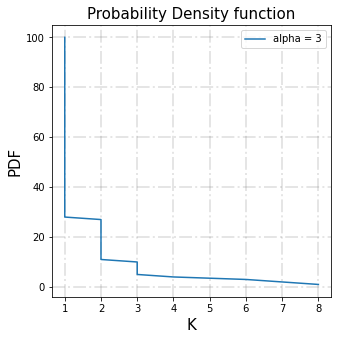

In [98]:
import matplotlib.pyplot as plt

y = range(1, 101)
plt.plot(seq_10_2_3, y, label='alpha = 3')
plt.xlabel('K', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.title('Probability Density function', fontsize=15)
plt.grid(b=True, color='grey', alpha=0.2, linestyle='-.', linewidth=2)
plt.rcParams["figure.figsize"] = [5, 5]
plt.legend(loc='best')
plt.show()

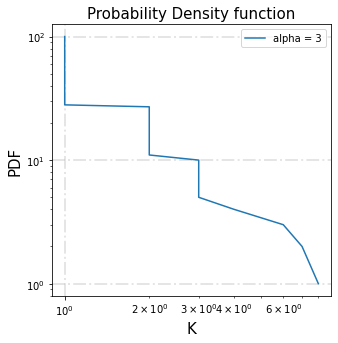

In [99]:
import matplotlib.pyplot as plt

y = range(1, 101)
plt.loglog(seq_10_2_3, y, label='alpha = 3')
plt.xlabel('K', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.title('Probability Density function', fontsize=15)
plt.grid(b=True, color='grey', alpha=0.2, linestyle='-.', linewidth=2)
plt.rcParams["figure.figsize"] = [5, 5]
plt.legend(loc='best')
plt.show()

*   **using the functions to create an adjacency vector from the degree sequence of the graph and find the graph's greatest component**



In [100]:
adj_vector_10_2_3 = generate_adj_vector([x for x in seq_10_2_3])
adj_vector_10_2_3

[[1, 2, 3, 4, 5, 6, 7, 8],
 [0, 2, 3, 4, 5, 6, 7],
 [0, 1, 3, 4, 5, 6],
 [0, 1, 2, 7],
 [0, 1, 2],
 [0, 1, 2],
 [0, 1, 2],
 [0, 1, 3],
 [0, 9, 10],
 [8, 10, 11],
 [8, 9],
 [9, 12],
 [11, 13],
 [12, 14],
 [13, 15],
 [14, 16],
 [15, 17],
 [16, 18],
 [17, 19],
 [18, 20],
 [19, 21],
 [20, 22],
 [21, 23],
 [22, 24],
 [23, 25],
 [24, 26],
 [25, 27],
 [26],
 [29],
 [28],
 [31],
 [30],
 [33],
 [32],
 [35],
 [34],
 [37],
 [36],
 [39],
 [38],
 [41],
 [40],
 [43],
 [42],
 [45],
 [44],
 [47],
 [46],
 [49],
 [48],
 [51],
 [50],
 [53],
 [52],
 [55],
 [54],
 [57],
 [56],
 [59],
 [58],
 [61],
 [60],
 [63],
 [62],
 [65],
 [64],
 [67],
 [66],
 [69],
 [68],
 [71],
 [70],
 [73],
 [72],
 [75],
 [74],
 [77],
 [76],
 [79],
 [78],
 [81],
 [80],
 [83],
 [82],
 [85],
 [84],
 [87],
 [86],
 [89],
 [88],
 [91],
 [90],
 [93],
 [92],
 [95],
 [94],
 [97],
 [96],
 [99],
 [98]]

In [101]:
visited = []
gComponent_10_2_3 = greatest_component(visited, [x for x in adj_vector_10_2_3], 0)
gComponent_10_2_3

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27]

* **making the graph connected**

In [102]:
Components_10_2_3 = []
visited = []
Components_10_2_3.append((greatest_component(visited, [x for x in adj_vector_10_2_3], 0)))

exist = [ 0 for x in seq_10_2_3]
for i in range(len(seq_10_2_3)):
  for j in Components_10_2_3:
    for k in j:
      exist[k] = 1
  if exist[i] == 0:
    visited = []
    Components_10_2_3.append((greatest_component(visited, [x for x in adj_vector_10_2_3], i)))

print(Components_10_2_3)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27], [28, 29], [30, 31], [32, 33], [34, 35], [36, 37], [38, 39], [40, 41], [42, 43], [44, 45], [46, 47], [48, 49], [50, 51], [52, 53], [54, 55], [56, 57], [58, 59], [60, 61], [62, 63], [64, 65], [66, 67], [68, 69], [70, 71], [72, 73], [74, 75], [76, 77], [78, 79], [80, 81], [82, 83], [84, 85], [86, 87], [88, 89], [90, 91], [92, 93], [94, 95], [96, 97], [98, 99]]


In [103]:
x = 0
for i in Components_10_2_3[1:] :
  for j in i:
    adj_vector_10_2_3[j].append(x)
    adj_vector_10_2_3[x].append(j)
    seq_10_2_3[x] += 1
    seq_10_2_3[j] += 1
    x +=1

adj_vector_10_2_3

[[1, 2, 3, 4, 5, 6, 7, 8, 28],
 [0, 2, 3, 4, 5, 6, 7, 29],
 [0, 1, 3, 4, 5, 6, 30],
 [0, 1, 2, 7, 31],
 [0, 1, 2, 32],
 [0, 1, 2, 33],
 [0, 1, 2, 34],
 [0, 1, 3, 35],
 [0, 9, 10, 36],
 [8, 10, 11, 37],
 [8, 9, 38],
 [9, 12, 39],
 [11, 13, 40],
 [12, 14, 41],
 [13, 15, 42],
 [14, 16, 43],
 [15, 17, 44],
 [16, 18, 45],
 [17, 19, 46],
 [18, 20, 47],
 [19, 21, 48],
 [20, 22, 49],
 [21, 23, 50],
 [22, 24, 51],
 [23, 25, 52],
 [24, 26, 53],
 [25, 27, 54],
 [26, 55],
 [29, 0, 56],
 [28, 1, 57],
 [31, 2, 58],
 [30, 3, 59],
 [33, 4, 60],
 [32, 5, 61],
 [35, 6, 62],
 [34, 7, 63],
 [37, 8, 64],
 [36, 9, 65],
 [39, 10, 66],
 [38, 11, 67],
 [41, 12, 68],
 [40, 13, 69],
 [43, 14, 70],
 [42, 15, 71],
 [45, 16, 72],
 [44, 17, 73],
 [47, 18, 74],
 [46, 19, 75],
 [49, 20, 76],
 [48, 21, 77],
 [51, 22, 78],
 [50, 23, 79],
 [53, 24, 80],
 [52, 25, 81],
 [55, 26, 82],
 [54, 27, 83],
 [57, 28, 84],
 [56, 29, 85],
 [59, 30, 86],
 [58, 31, 87],
 [61, 32, 88],
 [60, 33, 89],
 [63, 34, 90],
 [62, 35, 91],
 [65,

In [104]:
seq_10_2_3 = sorted(seq_10_2_3, reverse=True)
seq_10_2_3

[9,
 8,
 7,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [105]:
k = eval_k(seq_10_2_3)
k

2.94

In [106]:
from random import randint

for i in range(len(seq_10_2_3)):
  flag = 0
  x = randint(0, len(seq_10_2_3))
  y = randint(0, len(seq_10_2_3))
  if x != y and eval_k(seq_10_2_3) < 3:
    for k in adj_vector_10_2_3[x]:
      if k == y:
        flag = 1
        break
    if flag == 1:
      continue
    else:
      adj_vector_10_2_3[x].append(y)
      adj_vector_10_2_3[y].append(x)
      seq_10_2_3[x] += 1
      seq_10_2_3[y] += 1

In [107]:
k = eval_k(seq_10_2_3)
k

3.0

In [108]:
seq_10_2_3 = sorted(seq_10_2_3, reverse=True)
seq_10_2_3

[9,
 8,
 7,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

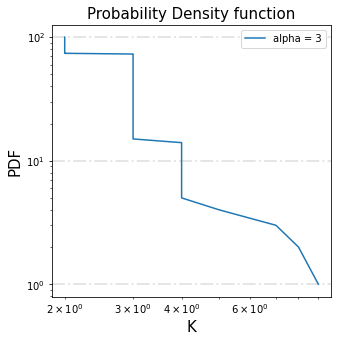

In [109]:
import matplotlib.pyplot as plt

y = range(1, 101)
plt.loglog(seq_10_2_3, y, label='alpha = 3')
plt.xlabel('K', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.title('Probability Density function', fontsize=15)
plt.grid(b=True, color='grey', alpha=0.2, linestyle='-.', linewidth=2)
plt.rcParams["figure.figsize"] = [5, 5]
plt.legend(loc='best')
plt.show()

In [110]:
Components_10_2_3 = []
visited = []
Components_10_2_3.append((greatest_component(visited, [x for x in adj_vector_10_2_3], 0)))

exist = [ 0 for x in seq_10_2_3]
for i in range(len(seq_10_2_3)):
  for j in Components_10_2_3:
    for k in j:
      exist[k] = 1
  if exist[i] == 0:
    visited = []
    Components_10_2_3.append((greatest_component(visited, [x for x in adj_vector_10_2_3], i)))

print(Components_10_2_3) # now the graph is connected

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 28, 29, 30, 31, 32, 33, 34, 35, 9, 10, 36, 56, 57, 58, 59, 60, 61, 62, 63, 11, 37, 38, 64, 84, 85, 86, 87, 88, 89, 90, 91, 12, 39, 65, 66, 92, 13, 40, 67, 93, 94, 14, 41, 68, 95, 15, 42, 69, 96, 46, 16, 43, 70, 97, 47, 18, 74, 17, 44, 71, 98, 19, 75, 45, 72, 99, 20, 73, 21, 48, 22, 49, 76, 23, 50, 77, 24, 51, 78, 25, 52, 79, 26, 53, 80, 27, 54, 81, 55, 82, 83]]


* **using BFS and shortestDistance function to calculate the average distance of the nodes in the graph**

In [111]:
dSum = 0
counter = 0
for i in range(floor(len(seq_10_2_3))):
  for j in range(floor(len(seq_10_2_3))):
    if i != j:
      dSum += shortestDistance(adj_vector_10_2_3, i, j, seq_10_2_3)
      counter+=1
avgDistance = dSum/counter
avgDistance

8.86909090909091



---



2. n = 10**4

*   **using the functions to generate a sequence with #nodes=10000 & alpha=3 & average k=3**

In [166]:
while True:
    seq_10_4_3 = make_sequence(10**4, 3)
    k = eval_k(seq_10_4_3)
    print(k)
    if k > 1.8:
      break

1.644
1.6098
1.6266
1.5924
1.627
1.6326
1.6922
1.6934
1.6216
1.6266
1.5876
1.6532
1.6494
1.6528
1.6406
1.6408
1.6206
1.6226
1.6288
1.6234
1.6022
1.6012
1.6144
1.6458
1.6666
1.6004
1.612
1.6288
1.6754
1.594
1.6274
1.681
1.6368
1.63
1.6762
1.6314
1.6542
1.6672
1.6366
1.6642
1.629
1.691
1.633
1.601
1.6068
1.6466
1.6684
1.6736
1.6438
1.6638
1.6432
1.6262
1.597
1.682
1.5948
1.6112
1.5924
1.6078
1.6122
1.6336
1.6582
1.6062
1.649
1.6834
1.6892
1.621
1.613
1.62
1.6292
1.6252
1.6838
1.63
1.6204
1.6098
1.6604
1.7022
1.6166
1.6606
1.5938
1.6326
1.6332
1.6494
1.6486
1.6444
1.703
1.6504
1.6314
1.6006
1.6858
1.648
1.6378
1.6732
1.6278
1.6456
1.6666
1.6556
1.6512
1.6072
1.6566
1.6322
1.6462
1.6446
1.623
1.6098
1.585
1.606
1.6286
1.662
1.5956
1.6084
1.6448
1.6356
1.6492
1.6246
1.739
1.656
1.6634
1.673
1.677
1.667
1.6066
1.6406
1.5914
1.6546
1.655
1.6664
1.663
1.7236
1.6014
1.6174
1.6396
1.6574
1.6384
1.6252
1.6196
1.5752
1.7322
1.6592
1.6218
1.6252
1.6894
1.686
1.6148
1.6302
1.625
1.6788
1.6498
1.6416

In [167]:
print(eval_k(seq_10_4_3))
seq_10_4_3 = [max(s-1, 1) for s in seq_10_4_3]
print(eval_k(seq_10_4_3))

2.1578
1.9137


In [168]:
seq_10_4_3

[5246,
 158,
 72,
 50,
 47,
 43,
 42,
 39,
 38,
 35,
 35,
 34,
 33,
 30,
 26,
 24,
 23,
 20,
 20,
 20,
 19,
 19,
 19,
 18,
 18,
 18,
 18,
 17,
 17,
 17,
 17,
 16,
 16,
 16,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 14,
 14,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 12,
 12,
 12,
 12,
 12,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 




*   **showing that the distribution of the sequence is power law , by ploting the sequence and showing that its loglog plot is linear**




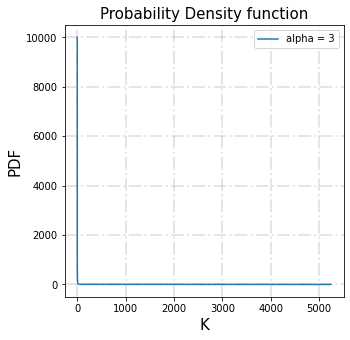

In [169]:
import matplotlib.pyplot as plt

y = range(1, 10001)
plt.plot(seq_10_4_3, y, label='alpha = 3')
plt.xlabel('K', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.title('Probability Density function', fontsize=15)
plt.grid(b=True, color='grey', alpha=0.2, linestyle='-.', linewidth=2)
plt.rcParams["figure.figsize"] = [5, 5]
plt.legend(loc='best')
plt.show()

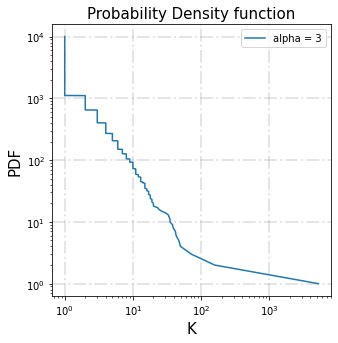

In [170]:
import matplotlib.pyplot as plt

y = range(1, 10001)
plt.loglog(seq_10_4_3, y, label='alpha = 3')
plt.xlabel('K', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.title('Probability Density function', fontsize=15)
plt.grid(b=True, color='grey', alpha=0.2, linestyle='-.', linewidth=2)
plt.rcParams["figure.figsize"] = [5, 5]
plt.legend(loc='best')
plt.show()

*   **using the functions to create an adjacency vector from the degree sequence of the graph and find the graph's greatest component**



In [171]:
adj_vector_10_4_3 = generate_adj_vector([x for x in seq_10_4_3])
adj_vector_10_4_3

[[1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  158,
  

In [172]:
visited = []
gComponent_10_4_3 = greatest_component(visited, [x for x in adj_vector_10_4_3], 0)
gComponent_10_4_3

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


* **making the graph conected**

In [173]:
Components_10_4_3 = []
visited = []
Components_10_4_3.append((greatest_component(visited, [x for x in adj_vector_10_4_3], 0)))

exist = [ 0 for x in seq_10_4_3]
for i in range(len(seq_10_4_3)):
  for j in Components_10_4_3:
    for k in j:
      exist[k] = 1
  if exist[i] == 0:
    visited = []
    Components_10_4_3.append((greatest_component(visited, [x for x in adj_vector_10_4_3], i)))

print(Components_10_4_3)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221

In [174]:
x = 0
for i in Components_10_4_3[1:] :
  for j in i:
    adj_vector_10_4_3[j].append(x)
    adj_vector_10_4_3[x].append(j)
    seq_10_4_3[x] += 1
    seq_10_4_3[j] += 1
    x +=1

adj_vector_10_4_3

[[1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  158,
  

In [175]:
seq_10_4_3 = sorted(seq_10_4_3, reverse=True)
seq_10_4_3

[5247,
 159,
 73,
 51,
 48,
 44,
 43,
 40,
 39,
 36,
 36,
 35,
 34,
 31,
 27,
 25,
 24,
 21,
 21,
 21,
 20,
 20,
 20,
 19,
 19,
 19,
 19,
 18,
 18,
 18,
 18,
 17,
 17,
 17,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 15,
 15,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 13,
 13,
 13,
 13,
 13,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 

In [176]:
k = eval_k(seq_10_4_3)
k

2.8643

In [177]:
from random import randint

for i in range(len(seq_10_4_3)):
  flag = 0
  x = randint(0, len(seq_10_4_3))
  y = randint(0, len(seq_10_4_3))
  if x != y and eval_k(seq_10_4_3) < 3:
    for k in adj_vector_10_4_3[x]:
      if k == y:
        flag = 1
        break
    if flag == 1:
      continue
    else:
      adj_vector_10_4_3[x].append(y)
      adj_vector_10_4_3[y].append(x)
      seq_10_4_3[x] += 1
      seq_10_4_3[y] += 1

In [178]:
k = eval_k(seq_10_4_3)
k

3.0001

In [179]:
seq_10_4_3 = sorted(seq_10_4_3, reverse=True)
seq_10_4_3

[5247,
 160,
 73,
 51,
 48,
 44,
 43,
 41,
 40,
 36,
 36,
 35,
 34,
 31,
 27,
 25,
 24,
 21,
 21,
 21,
 21,
 20,
 20,
 19,
 19,
 19,
 19,
 18,
 18,
 18,
 18,
 17,
 17,
 17,
 17,
 17,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 15,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 13,
 13,
 13,
 13,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 

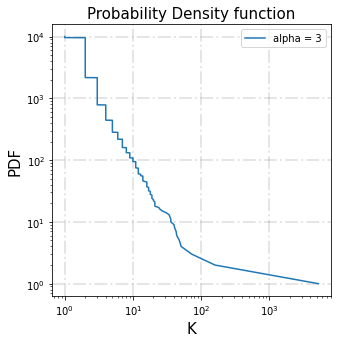

In [180]:
import matplotlib.pyplot as plt

y = range(1, 10001)
plt.loglog(seq_10_4_3, y, label='alpha = 3')
plt.xlabel('K', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.title('Probability Density function', fontsize=15)
plt.grid(b=True, color='grey', alpha=0.2, linestyle='-.', linewidth=2)
plt.rcParams["figure.figsize"] = [5, 5]
plt.legend(loc='best')
plt.show()

In [181]:
Components_10_4_3 = []
visited = []
Components_10_4_3.append((greatest_component(visited, [x for x in adj_vector_10_4_3], 0)))

exist = [ 0 for x in seq_10_4_3]
for i in range(len(seq_10_4_3)):
  for j in Components_10_4_3:
    for k in j:
      exist[k] = 1
  if exist[i] == 0:
    visited = []
    Components_10_4_3.append((greatest_component(visited, [x for x in adj_vector_10_4_3], i)))

print(Components_10_4_3) # now the graph is connected

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221

* **using BFS and shortestDistance function to calculate the average distance of the nodes in the graph**

In [183]:
dSum = 0
counter = 0
for i in range(floor(len(seq_10_4_3)/50)):
  for j in range(floor(len(seq_10_4_3)/50)):
    if i != j:
      dSum += shortestDistance(adj_vector_10_4_3, i*50, j*50, seq_10_4_3)
      counter+=1
avgDistance = dSum/counter
avgDistance

2.9396984924623117



---



# COMPARISON

* **calculating the error in the graph with n=100 and alpha=3**

In [112]:
from math import log
expected_value_10_2_3 = log(100) / log(log(100))
expected_value_10_2_3

3.0154738238809906

In [113]:
average_distance_10_2_3 = 8.86909090909091 # calculated before
error_percent_10_2_3 = (abs(average_distance_10_2_3 - expected_value_10_2_3) / expected_value_10_2_3) * 100
error_percent_10_2_3

194.11931348408012

* **calculating the error in the graph with n=10000 and alpha=3**

In [184]:
from math import log
expected_value_10_4_3 = log(10000) / log(log(10000))
expected_value_10_4_3

4.148191313801706

In [185]:
average_distance_10_4_3 = 2.9396984924623117 # calculated before
error_percent_10_4_3 = (abs(average_distance_10_4_3 - expected_value_10_4_3) / expected_value_10_4_3) * 100
error_percent_10_4_3

29.133005927632666




---



# >  alpha > 3


1. n = 10**2

*   **using the functions to generate a sequence with #nodes=100 & alpha>3 & average k=3**

In [1093]:
while True:
    seq_10_2_3plus = make_sequence(10**2, 4.3)
    k = eval_k(seq_10_2_3plus)
    print(k)
    # if k > 2.9 and k < 3.1:
    break

1.12


In [1094]:
seq_10_2_3plus

[3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]




*   **showing that the distribution of the sequence is power law , by ploting the sequence and showing that its loglog plot is linear**






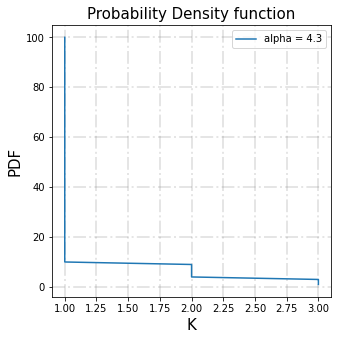

In [1095]:
import matplotlib.pyplot as plt

y = range(1, 101)
plt.plot(seq_10_2_3plus, y, label='alpha = 4.3')
plt.xlabel('K', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.title('Probability Density function', fontsize=15)
plt.grid(b=True, color='grey', alpha=0.2, linestyle='-.', linewidth=2)
plt.rcParams["figure.figsize"] = [5, 5]
plt.legend(loc='best')
plt.show()

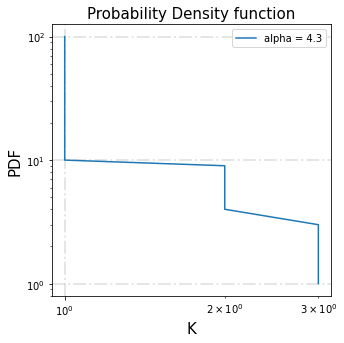

In [1096]:
import matplotlib.pyplot as plt

y = range(1, 101)
plt.loglog(seq_10_2_3plus, y, label='alpha = 4.3')
plt.xlabel('K', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.title('Probability Density function', fontsize=15)
plt.grid(b=True, color='grey', alpha=0.2, linestyle='-.', linewidth=2)
plt.rcParams["figure.figsize"] = [5, 5]
plt.legend(loc='best')
plt.show()

*   **using the functions to create an adjacency vector from the degree sequence of the graph and find the graph's greatest component**



In [1097]:
adj_vector_10_2_3plus = generate_adj_vector([x for x in seq_10_2_3plus])
adj_vector_10_2_3plus

[[1, 2, 3],
 [0, 2, 3],
 [0, 1, 4],
 [0, 1],
 [2, 5],
 [4, 6],
 [5, 7],
 [6, 8],
 [7, 9],
 [8],
 [11],
 [10],
 [13],
 [12],
 [15],
 [14],
 [17],
 [16],
 [19],
 [18],
 [21],
 [20],
 [23],
 [22],
 [25],
 [24],
 [27],
 [26],
 [29],
 [28],
 [31],
 [30],
 [33],
 [32],
 [35],
 [34],
 [37],
 [36],
 [39],
 [38],
 [41],
 [40],
 [43],
 [42],
 [45],
 [44],
 [47],
 [46],
 [49],
 [48],
 [51],
 [50],
 [53],
 [52],
 [55],
 [54],
 [57],
 [56],
 [59],
 [58],
 [61],
 [60],
 [63],
 [62],
 [65],
 [64],
 [67],
 [66],
 [69],
 [68],
 [71],
 [70],
 [73],
 [72],
 [75],
 [74],
 [77],
 [76],
 [79],
 [78],
 [81],
 [80],
 [83],
 [82],
 [85],
 [84],
 [87],
 [86],
 [89],
 [88],
 [91],
 [90],
 [93],
 [92],
 [95],
 [94],
 [97],
 [96],
 [99],
 [98]]

In [1098]:
visited = []
gComponent_10_2_3plus = greatest_component(visited, [x for x in adj_vector_10_2_3plus], 0)
gComponent_10_2_3plus

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

* **making the graph connected**

In [1099]:
components_10_2_3plus = []
visited = []
exist = [ 0 for x in seq_10_2_3plus]
components_10_2_3plus.append((greatest_component(visited, [x for x in adj_vector_10_2_3plus], 0)))
for i in components_10_2_3plus[-1]:
  exist[i] = 1

for i in range(len(seq_10_2_3plus)):
  if exist[i] == 0:
    visited = []
    components_10_2_3plus.append((greatest_component(visited, [x for x in adj_vector_10_2_3plus], i)))
    for k in components_10_2_3plus[-1]:
      exist[k] = 1

print(components_10_2_3plus)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [10, 11], [12, 13], [14, 15], [16, 17], [18, 19], [20, 21], [22, 23], [24, 25], [26, 27], [28, 29], [30, 31], [32, 33], [34, 35], [36, 37], [38, 39], [40, 41], [42, 43], [44, 45], [46, 47], [48, 49], [50, 51], [52, 53], [54, 55], [56, 57], [58, 59], [60, 61], [62, 63], [64, 65], [66, 67], [68, 69], [70, 71], [72, 73], [74, 75], [76, 77], [78, 79], [80, 81], [82, 83], [84, 85], [86, 87], [88, 89], [90, 91], [92, 93], [94, 95], [96, 97], [98, 99]]


In [1100]:
x = 0
for i in components_10_2_3plus[1:] :
  for j in i:
    adj_vector_10_2_3plus[j].append(x)
    adj_vector_10_2_3plus[x].append(j)
    seq_10_2_3plus[x] += 1
    seq_10_2_3plus[j] += 1
    x +=1

adj_vector_10_2_3plus

[[1, 2, 3, 10],
 [0, 2, 3, 11],
 [0, 1, 4, 12],
 [0, 1, 13],
 [2, 5, 14],
 [4, 6, 15],
 [5, 7, 16],
 [6, 8, 17],
 [7, 9, 18],
 [8, 19],
 [11, 0, 20],
 [10, 1, 21],
 [13, 2, 22],
 [12, 3, 23],
 [15, 4, 24],
 [14, 5, 25],
 [17, 6, 26],
 [16, 7, 27],
 [19, 8, 28],
 [18, 9, 29],
 [21, 10, 30],
 [20, 11, 31],
 [23, 12, 32],
 [22, 13, 33],
 [25, 14, 34],
 [24, 15, 35],
 [27, 16, 36],
 [26, 17, 37],
 [29, 18, 38],
 [28, 19, 39],
 [31, 20, 40],
 [30, 21, 41],
 [33, 22, 42],
 [32, 23, 43],
 [35, 24, 44],
 [34, 25, 45],
 [37, 26, 46],
 [36, 27, 47],
 [39, 28, 48],
 [38, 29, 49],
 [41, 30, 50],
 [40, 31, 51],
 [43, 32, 52],
 [42, 33, 53],
 [45, 34, 54],
 [44, 35, 55],
 [47, 36, 56],
 [46, 37, 57],
 [49, 38, 58],
 [48, 39, 59],
 [51, 40, 60],
 [50, 41, 61],
 [53, 42, 62],
 [52, 43, 63],
 [55, 44, 64],
 [54, 45, 65],
 [57, 46, 66],
 [56, 47, 67],
 [59, 48, 68],
 [58, 49, 69],
 [61, 50, 70],
 [60, 51, 71],
 [63, 52, 72],
 [62, 53, 73],
 [65, 54, 74],
 [64, 55, 75],
 [67, 56, 76],
 [66, 57, 77],
 [69

In [1101]:
seq_10_2_3plus = sorted(seq_10_2_3plus, reverse=True)
seq_10_2_3plus

[4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [1102]:
k = eval_k(seq_10_2_3plus)
k

2.92

In [1104]:
from random import randint

for i in range(len(seq_10_2_3plus)):
  flag = 0
  x = randint(0, len(seq_10_2_3plus))
  y = randint(0, len(seq_10_2_3plus))
  if x != y and eval_k(seq_10_2_3plus) < 3:
    for k in adj_vector_10_2_3plus[x]:
      if k == y:
        flag = 1
        break
    if flag == 1:
      continue
    else:
      adj_vector_10_2_3plus[x].append(y)
      adj_vector_10_2_3plus[y].append(x)
      seq_10_2_3plus[x] += 1
      seq_10_2_3plus[y] += 1
  elif eval_k(seq_10_2_3plus) >= 3:
    break

In [1105]:
k = eval_k(seq_10_2_3plus)
k

3.0

In [1106]:
seq_10_2_3plus = sorted(seq_10_2_3plus, reverse=True)
seq_10_2_3plus

[4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

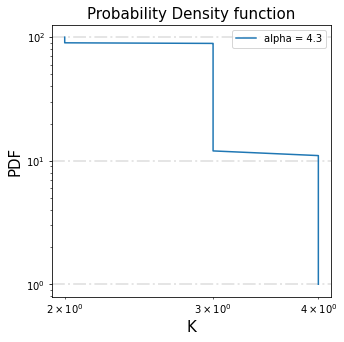

In [1107]:
import matplotlib.pyplot as plt

y = range(1, 101)
plt.loglog(seq_10_2_3plus, y, label='alpha = 4.3')
plt.xlabel('K', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.title('Probability Density function', fontsize=15)
plt.grid(b=True, color='grey', alpha=0.2, linestyle='-.', linewidth=2)
plt.rcParams["figure.figsize"] = [5, 5]
plt.legend(loc='best')
plt.show()

In [1108]:
Components_10_2_3plus = []
visited = []
Components_10_2_3plus.append((greatest_component(visited, [x for x in adj_vector_10_2_3plus], 0)))

exist = [ 0 for x in seq_10_2_3plus]
for i in range(len(seq_10_2_3plus)):
  for j in Components_10_2_3plus:
    for k in j:
      exist[k] = 1
  if exist[i] == 0:
    visited = []
    Components_10_2_3plus.append((greatest_component(visited, [x for x in adj_vector_10_2_3plus], i)))

print(Components_10_2_3plus) # now the graph is connected

[[0, 1, 2, 3, 10, 11, 4, 12, 13, 20, 21, 5, 14, 22, 23, 30, 31, 6, 15, 24, 32, 33, 40, 41, 7, 16, 25, 34, 42, 43, 50, 51, 8, 17, 26, 35, 44, 52, 53, 60, 61, 9, 18, 27, 36, 45, 54, 62, 63, 70, 71, 19, 28, 37, 46, 55, 64, 72, 73, 80, 81, 29, 77, 38, 47, 56, 65, 74, 82, 83, 90, 91, 39, 84, 76, 67, 87, 48, 57, 66, 75, 92, 93, 49, 85, 94, 86, 97, 58, 59, 95, 96, 68, 69, 78, 79, 88, 89, 98, 99]]


In [1109]:
len(Components_10_2_3plus)

1

* **using BFS and shortestDistance function to calculate the average distance of the nodes in the graph**

In [1110]:
dSum = 0
counter = 0
for i in range(floor(len(seq_10_2_3plus))):
  for j in range(floor(len(seq_10_2_3plus))):
    if i != j:
      dSum += shortestDistance(adj_vector_10_2_3plus, i, j, seq_10_2_3plus)
      counter+=1
avgDistance = dSum/counter
avgDistance

8.773737373737374



---


2. n = 10**4

*   **using the functions to generate a sequence with #nodes=10000 & alpha>3 & average k=3**

In [1130]:
while True:
    seq_10_4_3plus = make_sequence(10**4, 4.3)
    k = eval_k(seq_10_4_3plus)
    print(k)
    # if k > 1.53:
    break

1.1624


In [1131]:
seq_10_4_3plus

[24,
 20,
 13,
 11,
 10,
 9,
 9,
 9,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,




*   **showing that the distribution of the sequence is power law , by ploting the sequence and showing that its loglog plot is linear**






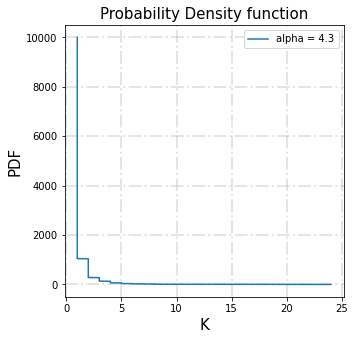

In [1132]:
import matplotlib.pyplot as plt

y = range(1, 10001)
plt.plot(seq_10_4_3plus, y, label='alpha = 4.3')
plt.xlabel('K', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.title('Probability Density function', fontsize=15)
plt.grid(b=True, color='grey', alpha=0.2, linestyle='-.', linewidth=2)
plt.rcParams["figure.figsize"] = [5, 5]
plt.legend(loc='best')
plt.show()

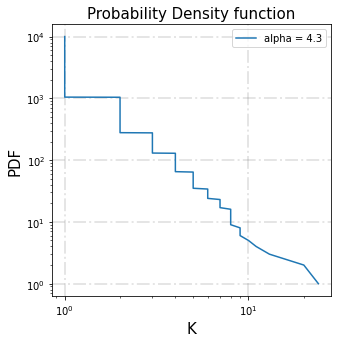

In [1133]:
import matplotlib.pyplot as plt

y = range(1, 10001)
plt.loglog(seq_10_4_3plus, y, label='alpha = 4.3')
plt.xlabel('K', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.title('Probability Density function', fontsize=15)
plt.grid(b=True, color='grey', alpha=0.2, linestyle='-.', linewidth=2)
plt.rcParams["figure.figsize"] = [5, 5]
plt.legend(loc='best')
plt.show()

*   **using the functions to create an adjacency vector from the degree sequence of the graph and find the graph's greatest component**



In [1134]:
adj_vector_10_4_3plus = generate_adj_vector([x for x in seq_10_4_3plus])
adj_vector_10_4_3plus

[[1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11],
 [0, 1, 2, 3, 5, 6, 7, 8, 9, 10],
 [0, 1, 2, 3, 4, 6, 7, 8, 9],
 [0, 1, 2, 3, 4, 5, 7, 8, 9],
 [0, 1, 2, 3, 4, 5, 6, 8, 9],
 [0, 1, 2, 3, 4, 5, 6, 7],
 [0, 1, 2, 3, 4, 5, 6, 7],
 [0, 1, 2, 3, 4, 11, 12, 13],
 [0, 1, 2, 3, 10, 12, 13, 14],
 [0, 1, 2, 10, 11, 13, 14, 15],
 [0, 1, 2, 10, 11, 12, 14, 15],
 [0, 1, 11, 12, 13, 15, 16, 17],
 [0, 1, 12, 13, 14, 16, 17, 18],
 [0, 1, 14, 15, 17, 18, 19],
 [0, 1, 14, 15, 16, 18, 19],
 [0, 1, 15, 16, 17, 19, 20],
 [0, 1, 16, 17, 18, 20, 21],
 [0, 1, 18, 19, 21, 22, 23],
 [0, 19, 20, 22, 23, 24, 25],
 [0, 20, 21, 23, 24, 25, 26],
 [0, 20, 21, 22, 24, 25],
 [0, 21, 22, 23, 25, 26],
 [21, 22, 23, 24, 26, 27],
 [22, 24, 25, 27, 28, 29],
 [25, 26, 28, 29, 30, 31],

In [1135]:
visited = []
gComponent_10_4_3plus = greatest_component(visited, [x for x in adj_vector_10_4_3plus], 0)
gComponent_10_4_3plus

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


* **making the graph connected**

In [1136]:
components_10_4_3plus = []
visited = []
exist = [ 0 for x in seq_10_4_3plus]
components_10_4_3plus.append((greatest_component(visited, [x for x in adj_vector_10_4_3plus], 0)))
for i in components_10_4_3plus[-1]:
  exist[i] = 1

for i in range(len(seq_10_4_3plus)):
  if exist[i] == 0:
    visited = []
    components_10_4_3plus.append((greatest_component(visited, [x for x in adj_vector_10_4_3plus], i)))
    for k in components_10_4_3plus[-1]:
      exist[k] = 1

print(components_10_4_3plus)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221

In [1137]:
x = 0
for i in components_10_4_3plus[1:] :
  for j in i:
    adj_vector_10_4_3plus[j].append(x)
    adj_vector_10_4_3plus[x].append(j)
    seq_10_4_3plus[x] += 1
    seq_10_4_3plus[j] += 1
    x +=1

adj_vector_10_4_3plus

[[1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  1042],
 [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 1043],
 [0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1044],
 [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 1045],
 [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 1046],
 [0, 1, 2, 3, 4, 6, 7, 8, 9, 1047],
 [0, 1, 2, 3, 4, 5, 7, 8, 9, 1048],
 [0, 1, 2, 3, 4, 5, 6, 8, 9, 1049],
 [0, 1, 2, 3, 4, 5, 6, 7, 1050],
 [0, 1, 2, 3, 4, 5, 6, 7, 1051],
 [0, 1, 2, 3, 4, 11, 12, 13, 1052],
 [0, 1, 2, 3, 10, 12, 13, 14, 1053],
 [0, 1, 2, 10, 11, 13, 14, 15, 1054],
 [0, 1, 2, 10, 11, 12, 14, 15, 1055],
 [0, 1, 11, 12, 13, 15, 16, 17, 1056],
 [0, 1, 12, 13, 14, 16, 17, 18, 1057],
 [0, 1, 14, 15, 17, 18, 19, 1058],
 [0, 1, 14, 15, 16, 18, 19, 1059],
 [0, 1, 15, 16, 17, 19, 20, 1060],
 [0, 1, 16, 17, 18, 20, 21, 1061],
 [0, 1, 18, 19, 21, 22, 23, 1062],
 [0, 19, 20, 22, 23, 24, 25, 1063],
 [0, 20, 21, 23, 24, 25, 26,

In [1138]:
seq_10_4_3plus = sorted(seq_10_4_3plus, reverse=True)
seq_10_4_3plus

[25,
 21,
 14,
 12,
 11,
 10,
 10,
 10,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,


In [1139]:
k = eval_k(seq_10_4_3plus)
k

2.954

In [1140]:
from random import randint

for i in range(len(seq_10_4_3plus)):
  flag = 0
  x = randint(0, len(seq_10_4_3plus))
  y = randint(0, len(seq_10_4_3plus))
  if x != y and eval_k(seq_10_4_3plus) < 3:
    for k in adj_vector_10_4_3plus[x]:
      if k == y:
        flag = 1
        break
    if flag == 1:
      continue
    else:
      adj_vector_10_4_3plus[x].append(y)
      adj_vector_10_4_3plus[y].append(x)
      seq_10_4_3plus[x] += 1
      seq_10_4_3plus[y] += 1
  elif eval_k(seq_10_4_3plus) >= 3:
    break

In [1141]:
k = eval_k(seq_10_4_3plus)
k

3.0

In [1142]:
seq_10_4_3plus = sorted(seq_10_4_3plus, reverse=True)
seq_10_4_3plus

[25,
 21,
 15,
 12,
 11,
 10,
 10,
 10,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,


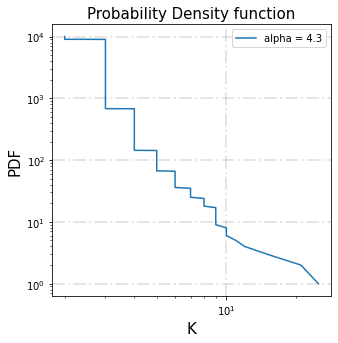

In [1144]:
import matplotlib.pyplot as plt

y = range(1, 10001)
plt.loglog(seq_10_4_3plus, y, label='alpha = 4.3')
plt.xlabel('K', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.title('Probability Density function', fontsize=15)
plt.grid(b=True, color='grey', alpha=0.2, linestyle='-.', linewidth=2)
plt.rcParams["figure.figsize"] = [5, 5]
plt.legend(loc='best')
plt.show()

In [1145]:
Components_10_4_3plus = []
visited = []
Components_10_4_3plus.append((greatest_component(visited, [x for x in adj_vector_10_4_3plus], 0)))

exist = [ 0 for x in seq_10_4_3plus]
for i in range(len(seq_10_4_3plus)):
  for j in Components_10_4_3plus:
    for k in j:
      exist[k] = 1
  if exist[i] == 0:
    visited = []
    Components_10_4_3plus.append((greatest_component(visited, [x for x in adj_vector_10_4_3plus], i)))

print(Components_10_4_3plus) # now the graph is connected

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 1042, 1043, 1044, 902, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 7875, 1061, 1062, 25, 1063, 26, 1064, 1065, 5788, 1066, 2084, 2085, 2086, 901, 903, 1944, 2087, 2088, 2089, 2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100, 2101, 2102, 7874, 6833, 8917, 2103, 2104, 27, 1067, 2105, 28, 29, 1068, 2106, 2107, 5789, 4746, 6830, 2108, 3126, 3127, 3128, 900, 1943, 904, 1945, 2986, 3129, 3130, 3131, 3132, 3133, 3134, 3135, 3136, 3137, 8062, 3138, 3139, 3140, 3141, 3142, 3143, 3144, 6832, 8916, 5791, 9959, 3145, 3146, 30, 31, 1069, 2109, 3147, 32, 1070, 1071, 2110, 3148, 3149, 4747, 6831, 3704, 7872, 3150, 4168, 4169, 4170, 899, 1942, 2985, 905, 1946, 2987, 4028, 4171, 4172, 4173, 2132, 4174, 4175, 4176, 4177, 4178, 4179, 8063, 7020, 9104, 4180, 4181, 4182, 4183, 4184, 4185, 4186, 5790, 9958, 4749, 4187, 4188, 33, 1072, 1073, 2111, 315

In [1146]:
len(Components_10_4_3plus)

1

* **using BFS and shortestDistance function to calculate the average distance of the nodes in the graph**

In [1147]:
dSum = 0
counter = 0
for i in range(50):
  for j in range(floor(len(seq_10_4_3plus)/100)):
    if i != j:
      dSum += shortestDistance(adj_vector_10_4_3plus, i, j*100, seq_10_4_3plus)
      counter+=1
      print(i, j*100)
avgDistance = dSum/counter
avgDistance

0 100
0 200
0 300
0 400
0 500
0 600
0 700
0 800
0 900
0 1000
0 1100
0 1200
0 1300
0 1400
0 1500
0 1600
0 1700
0 1800
0 1900
0 2000
0 2100
0 2200
0 2300
0 2400
0 2500
0 2600
0 2700
0 2800
0 2900
0 3000
0 3100
0 3200
0 3300
0 3400
0 3500
0 3600
0 3700
0 3800
0 3900
0 4000
0 4100
0 4200
0 4300
0 4400
0 4500
0 4600
0 4700
0 4800
0 4900
0 5000
0 5100
0 5200
0 5300
0 5400
0 5500
0 5600
0 5700
0 5800
0 5900
0 6000
0 6100
0 6200
0 6300
0 6400
0 6500
0 6600
0 6700
0 6800
0 6900
0 7000
0 7100
0 7200
0 7300
0 7400
0 7500
0 7600
0 7700
0 7800
0 7900
0 8000
0 8100
0 8200
0 8300
0 8400
0 8500
0 8600
0 8700
0 8800
0 8900
0 9000
0 9100
0 9200
0 9300
0 9400
0 9500
0 9600
0 9700
0 9800
0 9900
1 0
1 200
1 300
1 400
1 500
1 600
1 700
1 800
1 900
1 1000
1 1100
1 1200
1 1300
1 1400
1 1500
1 1600
1 1700
1 1800
1 1900
1 2000
1 2100
1 2200
1 2300
1 2400
1 2500
1 2600
1 2700
1 2800
1 2900
1 3000
1 3100
1 3200
1 3300
1 3400
1 3500
1 3600
1 3700
1 3800
1 3900
1 4000
1 4100
1 4200
1 4300
1 4400
1 4500
1 4600
1 470

22.36686868686869



---



3. n = 10**6

*   **using the functions to generate a sequence with #nodes=100000 & alpha>3 & average k=3**

In [1179]:
while True:
    seq_10_6_3plus = make_sequence(10**5, 4.3)
    k = eval_k(seq_10_6_3plus)
    print(k)
    # if k < 1.049:
    break

1.15176


In [ ]:
print(eval_k(seq_10_6_3plus))
seq_10_6_3plus = [max(s-2, 1) for s in seq_10_6_3plus]
print(eval_k(seq_10_6_3plus))

In [1180]:
seq_10_6_3plus

[30,
 25,
 25,
 21,
 21,
 16,
 16,
 16,
 15,
 15,
 15,
 14,
 14,
 13,
 13,
 13,
 13,
 13,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 




*   **showing that the distribution of the sequence is power law , by ploting the sequence and showing that its loglog plot is linear**






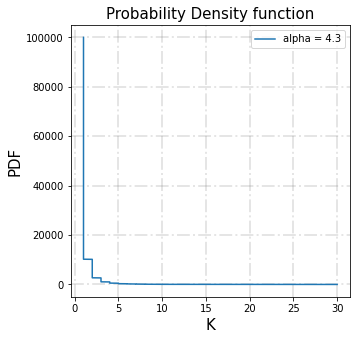

In [1183]:
import matplotlib.pyplot as plt

y = range(1, 100001)
plt.plot(seq_10_6_3plus, y, label='alpha = 4.3')
plt.xlabel('K', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.title('Probability Density function', fontsize=15)
plt.grid(b=True, color='grey', alpha=0.2, linestyle='-.', linewidth=2)
plt.rcParams["figure.figsize"] = [5, 5]
plt.legend(loc='best')
plt.show()

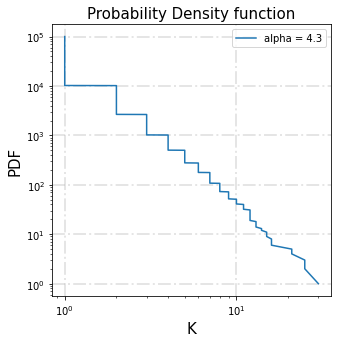

In [1184]:
import matplotlib.pyplot as plt

y = range(1, 100001)
plt.loglog(seq_10_6_3plus, y, label='alpha = 4.3')
plt.xlabel('K', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.title('Probability Density function', fontsize=15)
plt.grid(b=True, color='grey', alpha=0.2, linestyle='-.', linewidth=2)
plt.rcParams["figure.figsize"] = [5, 5]
plt.legend(loc='best')
plt.show()

*   **using the functions to create an adjacency vector from the degree sequence of the graph and find the graph's greatest component**



In [1185]:
adj_vector_10_6_3plus = generate_adj_vector([x for x in seq_10_6_3plus])
adj_vector_10_6_3plus

[[1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 [0,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25],
 [0,
  1,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25],
 [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
 [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
 [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14],
 [0,

In [1186]:
visited = []
gComponent_10_6_3plus = greatest_component(visited, [x for x in adj_vector_10_6_3plus], 0)
gComponent_10_6_3plus

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


* **making the graph connected**

In [1187]:
components_10_6_3plus = []
visited = []
exist = [ 0 for x in seq_10_6_3plus]
components_10_6_3plus.append((greatest_component(visited, [x for x in adj_vector_10_6_3plus], 0)))
for i in components_10_6_3plus[-1]:
  exist[i] = 1

for i in range(len(seq_10_6_3plus)):
  print(i)
  if exist[i] == 0:
    visited = []
    components_10_6_3plus.append((greatest_component(visited, [x for x in adj_vector_10_6_3plus], i)))
    for k in components_10_6_3plus[-1]:
      exist[k] = 1

print(components_10_6_3plus)

Streaming output truncated to the last 5000 lines.
95001
95002
95003
95004
95005
95006
95007
95008
95009
95010
95011
95012
95013
95014
95015
95016
95017
95018
95019
95020
95021
95022
95023
95024
95025
95026
95027
95028
95029
95030
95031
95032
95033
95034
95035
95036
95037
95038
95039
95040
95041
95042
95043
95044
95045
95046
95047
95048
95049
95050
95051
95052
95053
95054
95055
95056
95057
95058
95059
95060
95061
95062
95063
95064
95065
95066
95067
95068
95069
95070
95071
95072
95073
95074
95075
95076
95077
95078
95079
95080
95081
95082
95083
95084
95085
95086
95087
95088
95089
95090
95091
95092
95093
95094
95095
95096
95097
95098
95099
95100
95101
95102
95103
95104
95105
95106
95107
95108
95109
95110
95111
95112
95113
95114
95115
95116
95117
95118
95119
95120
95121
95122
95123
95124
95125
95126
95127
95128
95129
95130
95131
95132
95133
95134
95135
95136
95137
95138
95139
95140
95141
95142
95143
95144
95145
95146
95147
95148
95149
95150
95151
95152
95153
95154
95155
95156
95157
95158
9

In [1188]:
x = 0
for i in components_10_6_3plus[1:] :
  for j in i:
    adj_vector_10_6_3plus[j].append(x)
    adj_vector_10_6_3plus[x].append(j)
    seq_10_6_3plus[x] += 1
    seq_10_6_3plus[j] += 1
    x +=1

adj_vector_10_6_3plus

[[1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  502],
 [0,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  503],
 [0,
  1,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  504],
 [0,
  1,
  2,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  505],
 [0,
  1,
  2,
  3,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  506],
 [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 507],
 [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 508],
 [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 509],
 [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 510],
 [0, 1, 2, 3, 4, 5, 6, 7,

In [1189]:
seq_10_6_3plus = sorted(seq_10_6_3plus, reverse=True)
seq_10_6_3plus

[31,
 26,
 26,
 22,
 22,
 17,
 17,
 17,
 16,
 16,
 16,
 15,
 15,
 14,
 14,
 14,
 14,
 14,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,


In [1190]:
k = eval_k(seq_10_6_3plus)
k

3.14172

In [833]:
from random import randint

for i in range(len(seq_10_6_3plus)):
  flag = 0
  x = randint(0, len(seq_10_6_3plus))
  y = randint(0, len(seq_10_6_3plus))
  if x != y and eval_k(seq_10_6_3plus) < 3:
    for k in adj_vector_10_6_3plus[x]:
      if k == y:
        flag = 1
        break
    if flag == 1:
      continue
    else:
      adj_vector_10_6_3plus[x].append(y)
      adj_vector_10_6_3plus[y].append(x)
      seq_10_6_3plus[x] += 1
      seq_10_6_3plus[y] += 1
  elif eval_k(seq_10_6_3plus) >= 3:
    break

In [ ]:
k = eval_k(seq_10_6_3plus)
k

In [1191]:
seq_10_6_3plus = sorted(seq_10_6_3plus, reverse=True)
seq_10_6_3plus

[31,
 26,
 26,
 22,
 22,
 17,
 17,
 17,
 16,
 16,
 16,
 15,
 15,
 14,
 14,
 14,
 14,
 14,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,


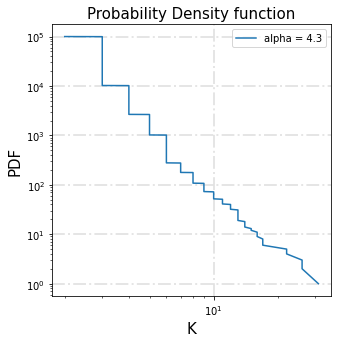

In [1192]:
import matplotlib.pyplot as plt

y = range(1, 100001)
plt.loglog(seq_10_6_3plus, y, label='alpha = 4.3')
plt.xlabel('K', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.title('Probability Density function', fontsize=15)
plt.grid(b=True, color='grey', alpha=0.2, linestyle='-.', linewidth=2)
plt.rcParams["figure.figsize"] = [5, 5]
plt.legend(loc='best')
plt.show()

* **using BFS and shortestDistance function to calculate the average distance of the nodes in the graph**

In [1193]:
dSum = 0
counter = 0
for i in range(50):
  for j in range(floor(len(seq_10_6_3plus)/5000)):
    if i != j:
      dSum += shortestDistance(adj_vector_10_6_3plus, i, j*5000, seq_10_6_3plus)
      counter+=1
      print(i, j*5000)
avgDistance = dSum/counter
avgDistance

0 5000
0 10000
0 15000
0 20000
0 25000
0 30000
0 35000
0 40000
0 45000
0 50000
0 55000
0 60000
0 65000
0 70000
0 75000
0 80000
0 85000
0 90000
0 95000
1 0
1 10000
1 15000
1 20000
1 25000
1 30000
1 35000
1 40000
1 45000
1 50000
1 55000
1 60000
1 65000
1 70000
1 75000
1 80000
1 85000
1 90000
1 95000
2 0
2 5000
2 15000
2 20000
2 25000
2 30000
2 35000
2 40000
2 45000
2 50000
2 55000
2 60000
2 65000
2 70000
2 75000
2 80000
2 85000
2 90000
2 95000
3 0
3 5000
3 10000
3 20000
3 25000
3 30000
3 35000
3 40000
3 45000
3 50000
3 55000
3 60000
3 65000
3 70000
3 75000
3 80000
3 85000
3 90000
3 95000
4 0
4 5000
4 10000
4 15000
4 25000
4 30000
4 35000
4 40000
4 45000
4 50000
4 55000
4 60000
4 65000
4 70000
4 75000
4 80000
4 85000
4 90000
4 95000
5 0
5 5000
5 10000
5 15000
5 20000
5 30000
5 35000
5 40000
5 45000
5 50000
5 55000
5 60000
5 65000
5 70000
5 75000
5 80000
5 85000
5 90000
5 95000
6 0
6 5000
6 10000
6 15000
6 20000
6 25000
6 35000
6 40000
6 45000
6 50000
6 55000
6 60000
6 65000
6 70000
6 7500

149.3030612244898



---



# COMPARISON

* **calculating the error in the graph with n=100 and alpha>3**

In [1021]:
from math import log
expected_value_10_2_3plus = log(100)
expected_value_10_2_3plus

4.605170185988092

In [1111]:
average_distance_10_2_3plus = 8.773737373737374 # calculated before
error_percent_10_2_3plus = (abs(average_distance_10_2_3plus - expected_value_10_2_3plus) / expected_value_10_2_3plus) * 100
error_percent_10_2_3plus

90.5192863541235

* **calculating the error in the graph with n=10000 and alpha>3**

In [1023]:
from math import log
expected_value_10_4_3plus = log(10000)
expected_value_10_4_3plus

9.210340371976184

In [1154]:
average_distance_10_4_3plus = 22.36686868686869 # calculated before
error_percent_10_4_3plus = (abs(average_distance_10_4_3plus - expected_value_10_4_3plus) / expected_value_10_4_3plus) * 100
error_percent_10_4_3plus

142.84519120404258

* **calculating the error in the graph with n=100000 and alpha>3**

In [1155]:
from math import log
expected_value_10_6_3plus = log(100000)
expected_value_10_6_3plus

11.512925464970229

In [1194]:
average_distance_10_6_3plus = 149.3030612244898 # calculated before
error_percent_10_6_3plus = (abs(average_distance_10_6_3plus - expected_value_10_6_3plus) / expected_value_10_6_3plus) * 100
error_percent_10_6_3plus

1196.8299124211856